# Imports and connections

In [55]:
!pip install pymongo
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [ ]:
# Data source https://baloncestoenvivo.feb.es/home.aspx
uri = "MONGODB_URI"
client = MongoClient(uri)
db = client["feb_db"]

# EDA

**[En]**
In this section, an exploratory data analysis (EDA) is performed to better understand the provided dataset. Key features are examined, patterns are identified, and potential anomalies, such as outliers or missing data, are detected.

**[Es]**
En esta sección se realiza un análisis exploratorio de datos (EDA) para comprender mejor el conjunto de datos proporcionado. Se examinan las características principales, se identifican patrones y se detectan posibles anomalías, como por ejemplo, valores atípicos o datos faltantes.

**[Cat]**
En aquesta secció es realitza una anàlisi exploratori de dades (EDA) per comprendre millor el conjunt de dades proporcionat. S'examinen les característiques principals, s'identifiquen patrons i es detecten possibles anomalies, com ara valors atípics o dades faltants.


In [58]:
db.list_collection_names()

['partits',
 'FEB1_teams_statistics',
 'FEB2_players_shots',
 'FEB2_teams_statistics',
 'FEB1_players_shots',
 'FEB3_players_statistics',
 'EBA_players_statistics',
 'FEB1_players_statistics',
 'jugadors',
 'EBA_teams_statistics',
 'EBA_players_shots',
 'FEB3_players_shots',
 'FEB3_teams_statistics',
 'FEB2_players_statistics']

[**En**]
I will do the project based on FEB3 collection. As it is from where I have more data.

[**Es**]
Haré el proyecto a partir de la colección FEB3. Ya que es de donde tengo más datos.

[**Cat**]
Faré el projecte a partir de la col·lecció FEB3. Ja que és d'on tinc més dades.

In [59]:
cursor = db.FEB3_players_statistics.find()

df_stats = pd.DataFrame(list(cursor))

In [60]:
df_stats.head()

,match_feb_id,competition_feb_id,competition_name,data,hora,phase_feb_id,phase_feb_name,round_feb_id,round_feb_name1,round_feb_name2,season_id,subphase_feb_id,subphase_feb_name,local,2pa,pps,pfd,rc_pl_m,rc_ce3r_m,pts,fg,rc_pr_a,rc_c3l_m,ts,ast2p,rc_mel_a,team_feb_code,tsa,astfd,orb,ftr,starter,2pm,rc_mbl_m,fgm,fga,ast,pf,eff_spanish,balance,rc_mer_m,rc_ce3l_m,team_feb_id,ftm,ppt2,blka,rc_e3l_a,team_club_feb_code,rc_mbl_a,rc_e3r_m,ast3p,drb,rc_mel_m,3pa,ppt3,tov,rc_ce3l_a,rc_c3r_m,rc_c3r_a,rc_ce3r_a,rc_pc_m,rc_mbr_m,minutes,rc_pc_a,rc_pr_m,rc_mer_a,rc_e3l_m,rc_pl_a,trb,rc_e3r_a,player_number,efg,rc_c3l_a,fta,stl,blk,3pm,dunk,rc_mbr_a,team_name,player_feb_id,player_name
0,2487031,3,Liga EBA,04-10-2025,18:00,88882,"Liga Regular ""A-A""",662643,Jornada 1(05/10/2025),NaN,2025,None,None,1,2,0.000000,0,0.0,0.0,0,0.000000,0.0,0.0,0.000000,None,0.0,20002313,5.00,None,0,0.000000,0,0,0.0,0,5,0,3,-7.0,0.0,0.0,0.0,979921,0,0.000000,0,0.0,200023,0.0,0.0,None,1,0.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,444,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0.000000,0.0,0,0,0,0,0.0,0.0,IRUKI TAKE,2273108,J. ELOSEGUI OLANO
1,2487031,3,Liga EBA,04-10-2025,18:00,88882,"Liga Regular ""A-A""",662643,Jornada 1(05/10/2025),NaN,2025,None,None,1,11,14.000000,3,2.0,0.0,15,0.538462,1.0,0.0,0.523743,None,0.0,20002313,14.32,None,1,0.076923,1,7,0.0,7,13,4,4,10.0,9.0,0.0,0.0,979921,1,1.272727,0,0.0,200023,0.0,0.0,None,2,0.0,2,0.0,3,0.0,0.0,0.0,2.0,5.0,0.0,1511,7.0,0.0,0.0,0.0,3.0,3,0.0,2,0.538462,0.0,3,0,0,0,0.0,0.0,IRUKI TAKE,2257749,A. GORDILLO BELTRAN
2,2487031,3,Liga EBA,04-10-2025,18:00,88882,"Liga Regular ""A-A""",662643,Jornada 1(05/10/2025),NaN,2025,None,None,1,3,0.000000,2,0.0,0.0,0,0.000000,0.0,0.0,0.000000,None,0.0,20002313,6.00,None,3,0.000000,1,0,0.0,0,6,1,1,3.0,-5.0,0.0,0.0,979921,0,0.000000,1,0.0,200023,0.0,0.0,None,3,0.0,3,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,643,0.0,0.0,0.0,0.0,0.0,6,0.0,4,0.000000,0.0,0,2,0,0,0.0,0.0,IRUKI TAKE,2334768,U. CONDE LAKUNTZA
3,2487031,3,Liga EBA,04-10-2025,18:00,88882,"Liga Regular ""A-A""",662643,Jornada 1(05/10/2025),NaN,2025,None,None,1,2,0.600000,2,0.0,0.0,4,0.200000,0.0,0.0,0.340136,None,0.0,20002313,5.88,None,1,0.200000,0,0,0.0,1,5,1,3,2.0,5.0,0.0,1.0,979921,1,0.000000,0,0.0,200023,0.0,0.0,None,2,0.0,3,1.0,0,3.0,0.0,0.0,0.0,0.0,0.0,1640,1.0,0.0,0.0,0.0,1.0,3,0.0,5,0.300000,0.0,2,0,0,1,0.0,0.0,IRUKI TAKE,2432734,E. ERRASTI URANGA
4,2487031,3,Liga EBA,04-10-2025,18:00,88882,"Liga Regular ""A-A""",662643,Jornada 1(05/10/2025),NaN,2025,None,None,1,1,2.428571,7,1.0,1.0,10,0.285714,0.0,0.0,0.496032,None,0.0,20002313,10.08,None,0,0.714286,0,1,0.0,2,7,1,5,12.0,6.0,0.0,0.0,979921,5,2.000000,0,0.0,200023,0.0,0.0,None,4,0.0,6,0.5,2,5.0,0.0,0.0,1.0,0.0,0.0,1616,0.0,0.0,0.0,0.0,1.0,4,0.0,8,0.357143,0.0,7,4,0,1,0.0,0.0,IRUKI TAKE,2335169,U. PEREZ SANZ


[**En**]

Here you can see the columns that the FEB3 collection has, which will be used for the project. Each row represents a player and their statistics in different matches. However, there are many columns that do not provide relevant information and others that have empty or null content. Therefore, it will be necessary to clean and select the most significant columns for further analysis.

[**Es**]

Aqui se pueden apreciar las columnas que tiene la colección FEB3 que se usara para el proyecto. Cada fila representa un jugador y sus estadísticas en diferentes partidos. No obstante, hay muchas columnas que no aportan información relevante y otras que tienen contenido vacío o nulo. Por lo tanto, será necesario realizar una limpieza y selección de las columnas más significativas para el análisis posterior.

[**Cat**]

Aquí es poden apreciar les columnes que té la col·lecció FEB3 que s'utilitzarà per al projecte. Cada fila representa un jugador i les seves estadístiques en diferents partits. No obstant això, hi ha moltes columnes que no aporten informació rellevant i altres que tenen contingut buit o nul. Per tant, serà necessari realitzar una neteja i selecció de les columnes més significatives per a l'anàlisi posterior.

In [61]:
df_stats.shape

(203913, 82)

[**En**]

Now we seek to remove from the dataset all those players who do not have enough games played to be considered in the analysis. Leaving them would be a mistake as they could distort the results.

[**Es**]

Ahora se busca eliminar del dataset a todos esos jugadores que no tienen suficientes partidos jugados para ser considerados en el análisis. Dejarlos sería un error ya que podrían distorsionar los resultados.

[**Cat**]

Ara es busca eliminar del dataset a tots aquests jugadors que no tenen prou partits jugats per ser considerats en l'anàlisi. Deixar-los seria un error ja que podrien distorsionar els resultats.


In [62]:
games_per_player = (
    df_stats.groupby("player_feb_id")["match_feb_id"]
    .nunique()
    .sort_values(ascending=False)
)

games_per_player.describe()


count    6748.000000
mean       30.218139
std        30.861637
min         1.000000
25%         7.000000
50%        20.000000
75%        45.000000
max       144.000000
Name: match_feb_id, dtype: float64

[**En**]

A minimum threshold has been chosen to consider a player in the first quartile (25%) of games played. This means that all those players who have played less than 25% of the total games will be removed from the analysis. (Those who have not reached playing 7 games).

[**Es**]

Se ha escogido como umbral mínimo para considerar a un jugador en primer cuartil (25%) de partidos jugados. Esto significa que se eliminarán del análisis todos aquellos jugadores que hayan jugado menos del 25% de los partidos totales. (Es decir, que no hayan llegado a jugar 7 partidos).

[**Cat**]

S'ha escollit com a llindar mínim per considerar un jugador en primer quartil (25%) de partits jugats. Això significa que s'eliminaran de l'anàlisi tots aquells jugadors que hagin jugat menys del 25% dels partits totals. (És a dir, que no hagin arribat a jugar 7 partits).

In [63]:
MIN_GAMES = 7

valid_players = games_per_player[games_per_player >= MIN_GAMES].index

df_stats_clean = df_stats[df_stats["player_feb_id"].isin(valid_players)]


In [64]:
df_stats_clean.shape

(199464, 82)

[**En**]

Now that it has been cleaned the dataset of players with few games played, the next step is to make a dataframe where each row is a player and their average statistics in the different games played. This will allow us to have a clearer view of each player's performance throughout the seasons and facilitate further analysis.

[**Es**]

Ahora que se ha limpiado el dataset de jugadores con pocos partidos jugados, el siguiente paso es hacer un dataframe donde cada fila sea un jugador y sus estadísticas medias en los diferentes partidos jugados. Esto nos permitirá tener una visión más clara del rendimiento de cada jugador a lo largo de las temporadas y facilitará el análisis posterior.

[**Cat**]

Ara que ja s'ha natejat el dataset de jugadors amb pocs partits jugats, el següent pas és fer un dataframe on cada fila sigui un jugador i les seves estadístiques mitjanes en els diferents partits jugats. Això ens permetrà tenir una visió més clara del rendiment de cada jugador al llarg de les temporades i facilitarà l'anàlisi posterior.

In [65]:
df_players = (
    df_stats_clean
    .groupby("player_feb_id")
    .mean(numeric_only=True)
    .reset_index()
)

player_names = (
    df_stats_clean
    .groupby("player_feb_id")["player_name"]
    .first()
)

df_players = df_players.merge(
    player_names,
    on="player_feb_id",
    how="left"
)

In [66]:
df_players.head()

,player_feb_id,local,2pa,pps,pfd,rc_pl_m,rc_ce3r_m,pts,fg,rc_pr_a,rc_c3l_m,ts,rc_mel_a,tsa,orb,ftr,starter,2pm,rc_mbl_m,fgm,fga,ast,pf,eff_spanish,balance,rc_mer_m,rc_ce3l_m,ftm,ppt2,blka,rc_e3l_a,rc_mbl_a,rc_e3r_m,drb,rc_mel_m,3pa,ppt3,tov,rc_ce3l_a,rc_c3r_m,rc_c3r_a,rc_ce3r_a,rc_pc_m,rc_mbr_m,minutes,rc_pc_a,rc_pr_m,rc_mer_a,rc_e3l_m,rc_pl_a,trb,rc_e3r_a,efg,rc_c3l_a,fta,stl,blk,3pm,dunk,rc_mbr_a,player_name
0,1002585,0.500000,3.329787,3.651632,1.510638,0.207547,0.566038,8.893617,0.345991,0.603774,0.0,0.463011,0.339623,9.223404,0.691489,0.162575,0.308511,1.468085,0.037736,3.074468,8.521277,1.617021,1.553191,7.910448,-1.244681,0.037736,0.603774,1.138298,0.844710,0.085106,0.490566,0.150943,0.132075,3.404255,0.09434,5.191489,0.928514,1.436170,2.283019,0.037736,0.075472,1.773585,0.566038,0.075472,1302.510638,0.924528,0.301887,0.245283,0.169811,0.509434,4.095745,0.509434,9.024746,0.0,1.595745,1.042553,0.106383,1.606383,0.000000,0.245283,J. VARO BARBANCHO
1,1005537,0.428571,0.142857,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.142857,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.142857,0.000000,0.285714,NaN,-0.142857,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.571429,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,84.142857,NaN,NaN,NaN,NaN,NaN,0.571429,NaN,0.071429,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,D. VAZQUEZ RIVEIRO
2,1015619,0.500000,2.192308,1.952289,0.576923,NaN,NaN,4.192308,0.258974,NaN,NaN,0.336303,NaN,5.544615,0.653846,0.099817,0.384615,0.807692,NaN,1.538462,5.307692,0.423077,1.500000,1.730769,-6.692308,NaN,NaN,0.384615,0.791667,0.115385,NaN,NaN,NaN,1.269231,NaN,3.115385,0.453497,0.576923,NaN,NaN,NaN,NaN,NaN,NaN,950.884615,NaN,NaN,NaN,NaN,NaN,1.923077,NaN,11.980769,NaN,0.538462,0.500000,0.115385,0.730769,0.000000,NaN,A. VICENTE DE FUENTES
3,1020605,0.464286,3.857143,3.846978,1.928571,NaN,NaN,6.250000,0.344170,NaN,NaN,0.428434,NaN,7.258571,1.178571,0.250244,0.428571,1.642857,NaN,2.250000,6.535714,1.357143,1.321429,8.307692,1.250000,NaN,NaN,1.142857,0.763818,0.035714,NaN,NaN,NaN,2.107143,NaN,2.678571,0.729167,1.321429,NaN,NaN,NaN,NaN,NaN,NaN,1142.571429,NaN,NaN,NaN,NaN,NaN,3.285714,NaN,12.214286,NaN,1.642857,1.392857,0.035714,0.607143,0.071429,NaN,P. VILA CAMPRODON
4,1025355,0.500000,3.272727,3.221429,1.590909,NaN,NaN,3.727273,0.396310,NaN,NaN,0.432624,NaN,4.469091,1.090909,0.586488,0.636364,1.454545,NaN,1.500000,3.909091,0.454545,2.363636,2.928571,-5.227273,NaN,NaN,0.681818,0.974048,0.136364,NaN,NaN,NaN,2.045455,NaN,0.636364,0.150000,0.954545,NaN,NaN,NaN,NaN,NaN,NaN,1006.181818,NaN,NaN,NaN,NaN,NaN,3.136364,NaN,5.045455,NaN,1.272727,0.454545,0.090909,0.045455,0.045455,NaN,A. VILLALAIN SANZ


[**En**]

You will have noticed that some fields have been removed in the data merging process for creating the players dataframe. This is because when averaging the statistics, non-numeric columns are automatically removed since it is not possible to calculate the mean over them. However, as can be seen in the code, if of interest, these columns can be recovered or preserved. In this case, it has been decided to recover only the player's name field to facilitate the identification of each row, as it has been considered that no other non-numeric field added value to the analysis.

[**Es**]

Habrás notado que algunos campos han sido eliminados en el proceso de fusión de datos para la creación del dataframe de jugadores. Esto se debe a que al hacer el promedio de las estadísticas, las columnas no numéricas se eliminan automáticamente porque no es posible calcular la media sobre ellas. No obstante, como se puede apreciar en el código, en caso de ser de interés, estas columnas se pueden recuperar o conservar. En este caso se ha decidido recuperar solo el campo del nombre del jugador para facilitar la identificación de cada fila, ya que se ha considerado que ningún otro campo no numérico aportaba valor al análisis.

[**Cat**]

Hauràs notat que alguns camps han estat eliminats en el procés de fusió de dades per a la creació del dataframe de jugadors. Això es deu al fet que en fer la mitjana de les estadístiques, les columnes no numèriques s'eliminen automàticament perquè no és possible calcular la mitjana sobre elles. No obstant això, com es pot apreciar en el codi, en cas de ser d'interès, aquestes columnes es poden recuperar o conservar. En aquest cas s'ha decidit recuperar només el camp del nom del jugador per facilitar la identificació de cada fila, ja que s'ha considerat que cap altre camp no numèric aportava valor a l'anàlisi.

In [67]:
list(df_players.columns)

['player_feb_id',
 'local',
 '2pa',
 'pps',
 'pfd',
 'rc_pl_m',
 'rc_ce3r_m',
 'pts',
 'fg',
 'rc_pr_a',
 'rc_c3l_m',
 'ts',
 'rc_mel_a',
 'tsa',
 'orb',
 'ftr',
 'starter',
 '2pm',
 'rc_mbl_m',
 'fgm',
 'fga',
 'ast',
 'pf',
 'eff_spanish',
 'balance',
 'rc_mer_m',
 'rc_ce3l_m',
 'ftm',
 'ppt2',
 'blka',
 'rc_e3l_a',
 'rc_mbl_a',
 'rc_e3r_m',
 'drb',
 'rc_mel_m',
 '3pa',
 'ppt3',
 'tov',
 'rc_ce3l_a',
 'rc_c3r_m',
 'rc_c3r_a',
 'rc_ce3r_a',
 'rc_pc_m',
 'rc_mbr_m',
 'minutes',
 'rc_pc_a',
 'rc_pr_m',
 'rc_mer_a',
 'rc_e3l_m',
 'rc_pl_a',
 'trb',
 'rc_e3r_a',
 'efg',
 'rc_c3l_a',
 'fta',
 'stl',
 'blk',
 '3pm',
 'dunk',
 'rc_mbr_a',
 'player_name']

[**En**]

Now it is shown the columns present in the FEB3 collection, indicating which ones can be discarded at first and which ones cannot. We must keep in mind that in the end we have to keep only those that provide relevant information for the model, and given the volume of data we have, it would be appropriate to end up with only about 10-12 columns.

[**Es**]

A continuación se muestra una lista de las columnas presentes en la colección FEB3, indicando cuáles en una primera instancia podemos descartar de primeras y cuáles no. Debemos tener en cuenta que al final nos tenemos que quedar sólo con las que aporten información relevante para el modelo, y que dado el volumen de datos que tenemos, sería adecuado quedarnos al final con sólo unas 10-12 columnas.

[**Cat**]

A continuació es mostra una llista de les columnes presents en la col·lecció FEB3, indicant quines en una primera instància podem descartar de primeres i quines no. Hem de tenir en compte que al final ens hem de quedar només amb les que aportin informació rellevant per al model, i que donat al volum de dades que tenim, seria adient quedar-nos al final amb només unes 10-12 columnes.

### Anàlisi de cada columna existent a la vista original:

#### Data we do not want ❌ (Do not provide necessary information)

- "competition_feb_id": "111": Competition identifier
- "competition_name": "LIGA EBA": Competition name
- "season_id": "2023-2024": Season identifier
- "phase_feb_id": "85388": Phase identifier
- "phase_feb_name": "FF 2ºA1-2ºA2 2ºA1-2ºA2": Phase name
- "subphase_feb_id": null: Subphase identifier
- "subphase_feb_name": null: Subphase name
- "round_feb_id": "640706": Round identifier
- "round_feb_name1": "Jornada 1(12/05/2024)": Round name
- "round_feb_name2": "2ºA1-2ºA2": Alternative round name
- "match_feb_id": "2400233": Match identifier
- "data": "12-05-2024": Match date
- "hora": "17:00": Match time
- "local": 1: Played as home (1) or away (0)
- "team_feb_id": "923496": Team identifier
- "team_name": "JAEN PARAISO INTERIOR FS": Team name
- "team_feb_code": "23560100": Team FEB code
- "team_club_feb_code": "235601": Team club code
- "player_number": "0": Player number
- "starter": 0: Started as a starter or not.
- "astfd": null: Ignore

#### Data we want ✅
- "player_feb_id": "1633525": Player identifier (not for the model)
- "player_name": "P. AGUDO LASO": Player name (not for the model)
- "pts": 0: Player points
- "minutes": 0: Seconds played
- "ftm": 0: Free throws made
- "fta": 0: Free throws attempted
- "2pm": 0: 2-point shots made
- "2pa": 0: 2-point shots attempted
- "ppt2": null: Points per 2-point attempt (2*2pm/2pa)
- "3pm": 0: 3-point shots made
- "3pa": 0: 3-point shots attempted
- "ppt3": null: Points per 3-point attempt (3*3pm/3pa)
- "fgm": 0: Field goals made
- "fga": 0: Field goals attempted
- "fg": null: Field goal ratio (fgm/fga)
- "pps": null: Points per shot ((2*2pm)+(3*"3pm"))/fga
- "tsa": 0,true shooting attempted (fga+ 0.44*fta)
- "ts": null: True shooting (pts/(2*tsa))
- "efg": null, Shooting efficiency (fgm + 0.5·2pa + 3·3pa)
- "tov": 0: Turnovers
- "stl": 0: Steals
- "ast": 0: Assists
- "ast2p": null: Assists of 2 points
- "ast3p": null: Assists of 3 points
- "orb": 0: Offensive rebounds
- "drb": 0: Defensive rebounds
- "trb": 0: Total rebounds
- "blk": 0: Blocks made
- "blka": 0: Blocks against
- "pf": 0: Personal fouls committed
- "pfd": 0: Personal fouls received
- "dunk": 0: Dunks
- "ftr": null: Free throws attempted relative to field goals attempted
- "eff_spanish": 0: Player evaluation
- "balance": 0: Balance +/-
- "rc_pc_m": 0: Shots made in PC
- "rc_pc_a": 0: Shots attempted in PC
- "rc_pl_m": 0: Shots made in PL
- "rc_pl_a": 0: Shots attempted in PL
- "rc_pr_m": 0: Shots made in PR
- "rc_pr_a": 0: Shots attempted in PR
- "rc_mbl_m": 0: Shots made in MBL
- "rc_mbl_a": 0: Shots attempted in MBL
- "rc_mbr_m": 0: Shots made in MBR
- "rc_mbr_a": 0: Shots attempted in MBR
- "rc_mel_m": 0: Shots made in MEL
- "rc_mel_a": 0: Shots attempted in MEL
- "rc_mer_m": 0: Shots made in MER
- "rc_mer_a": 0: Shots attempted in MER
- "rc_c3l_m": 0: Shots made in C3L
- "rc_c3l_a": 0: Shots attempted in C3L
- "rc_c3r_m": 0: Shots made in C3R
- "rc_c3r_a": 0: Shots attempted in C3R
- "rc_ce3l_m": 0: Shots made in Ce3L
- "rc_ce3l_a": 0: Shots attempted in Ce3L
- "rc_ce3r_m": 0: Shots made in Ce3R
- "rc_ce3r_a": 0: Shots attempted in Ce3R
- "rc_e3l_m": 0: Shots made in E3L
- "rc_e3l_a": 0: Shots attempted in E3L
- "rc_e3r_m": 0: Shots made in E3R
- "rc_e3r_a": 0: Shots attempted in E3R

In [68]:
cols_keep=[
"player_feb_id","player_name",
"pts","minutes",
"ftm","fta","2pm","2pa","ppt2",
"3pm","3pa","ppt3",
"fgm","fga","fg",
"pps","tsa","ts","efg",
"tov","stl","ast","ast2p","ast3p",
"orb","drb","trb",
"blk","blka",
"pf","pfd",
"dunk",
"ftr",
"eff_spanish","balance",
"rc_pc_m","rc_pc_a","rc_pl_m","rc_pl_a","rc_pr_m","rc_pr_a",
"rc_mbl_m","rc_mbl_a","rc_mbr_m","rc_mbr_a",
"rc_mel_m","rc_mel_a","rc_mer_m","rc_mer_a",
"rc_c3l_m","rc_c3l_a","rc_c3r_m","rc_c3r_a",
"rc_ce3l_m","rc_ce3l_a","rc_ce3r_m","rc_ce3r_a",
"rc_e3l_m","rc_e3l_a","rc_e3r_m","rc_e3r_a"
]

cols_keep=[c for c in cols_keep if c in df_players.columns]

df_players_clean=df_players[cols_keep].copy()

df_players_clean.columns


Index(['player_feb_id', 'player_name', 'pts', 'minutes', 'ftm', 'fta', '2pm',
       '2pa', 'ppt2', '3pm', '3pa', 'ppt3', 'fgm', 'fga', 'fg', 'pps', 'tsa',
       'ts', 'efg', 'tov', 'stl', 'ast', 'orb', 'drb', 'trb', 'blk', 'blka',
       'pf', 'pfd', 'dunk', 'ftr', 'eff_spanish', 'balance', 'rc_pc_m',
       'rc_pc_a', 'rc_pl_m', 'rc_pl_a', 'rc_pr_m', 'rc_pr_a', 'rc_mbl_m',
       'rc_mbl_a', 'rc_mbr_m', 'rc_mbr_a', 'rc_mel_m', 'rc_mel_a', 'rc_mer_m',
       'rc_mer_a', 'rc_c3l_m', 'rc_c3l_a', 'rc_c3r_m', 'rc_c3r_a', 'rc_ce3l_m',
       'rc_ce3l_a', 'rc_ce3r_m', 'rc_ce3r_a', 'rc_e3l_m', 'rc_e3l_a',
       'rc_e3r_m', 'rc_e3r_a'],
      dtype='str')

In [69]:
df_players_clean.head(10)

,player_feb_id,player_name,pts,minutes,ftm,fta,2pm,2pa,ppt2,3pm,3pa,ppt3,fgm,fga,fg,pps,tsa,ts,efg,tov,stl,ast,orb,drb,trb,blk,blka,pf,pfd,dunk,ftr,eff_spanish,balance,rc_pc_m,rc_pc_a,rc_pl_m,rc_pl_a,rc_pr_m,rc_pr_a,rc_mbl_m,rc_mbl_a,rc_mbr_m,rc_mbr_a,rc_mel_m,rc_mel_a,rc_mer_m,rc_mer_a,rc_c3l_m,rc_c3l_a,rc_c3r_m,rc_c3r_a,rc_ce3l_m,rc_ce3l_a,rc_ce3r_m,rc_ce3r_a,rc_e3l_m,rc_e3l_a,rc_e3r_m,rc_e3r_a
0,1002585,J. VARO BARBANCHO,8.893617,1302.510638,1.138298,1.595745,1.468085,3.329787,0.844710,1.606383,5.191489,0.928514,3.074468,8.521277,0.345991,3.651632,9.223404,0.463011,9.024746,1.436170,1.042553,1.617021,0.691489,3.404255,4.095745,0.106383,0.085106,1.553191,1.510638,0.000000,0.162575,7.910448,-1.244681,0.566038,0.924528,0.207547,0.509434,0.301887,0.603774,0.037736,0.150943,0.075472,0.245283,0.09434,0.339623,0.037736,0.245283,0.0,0.000000,0.037736,0.075472,0.603774,2.283019,0.566038,1.773585,0.169811,0.490566,0.132075,0.509434
1,1005537,D. VAZQUEZ RIVEIRO,0.000000,84.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,NaN,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.571429,0.571429,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,NaN,-0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1015619,A. VICENTE DE FUENTES,4.192308,950.884615,0.384615,0.538462,0.807692,2.192308,0.791667,0.730769,3.115385,0.453497,1.538462,5.307692,0.258974,1.952289,5.544615,0.336303,11.980769,0.576923,0.500000,0.423077,0.653846,1.269231,1.923077,0.115385,0.115385,1.500000,0.576923,0.000000,0.099817,1.730769,-6.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020605,P. VILA CAMPRODON,6.250000,1142.571429,1.142857,1.642857,1.642857,3.857143,0.763818,0.607143,2.678571,0.729167,2.250000,6.535714,0.344170,3.846978,7.258571,0.428434,12.214286,1.321429,1.392857,1.357143,1.178571,2.107143,3.285714,0.035714,0.035714,1.321429,1.928571,0.071429,0.250244,8.307692,1.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1025355,A. VILLALAIN SANZ,3.727273,1006.181818,0.681818,1.272727,1.454545,3.272727,0.974048,0.045455,0.636364,0.150000,1.500000,3.909091,0.396310,3.221429,4.469091,0.432624,5.045455,0.954545,0.454545,0.454545,1.090909,2.045455,3.136364,0.090909,0.136364,2.363636,1.590909,0.045455,0.586488,2.928571,-5.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1026534,M. VILLANUEVA CUBELO,3.111111,927.333333,0.333333,0.777778,0.222222,1.111111,0.380952,0.777778,2.777778,0.682143,1.000000,3.888889,0.231250,1.025000,4.231111,0.325100,0.318750,1.888889,0.444444,1.888889,0.444444,1.666667,2.111111,0.000000,0.000000,2.000000,1.111111,0.111111,0.097917,1.444444,-5.333333,0.111111,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.000000,0.222222,0.00000,0.000000,0.111111,0.222222,0.0,0.000000,0.000000,0.000000,0.333333,0.888889,0.444444,0.888889,0.000000,0.444444,0.000000,0.222222
6,1042047,E. SUAREZ REIZABAL,5.095238,873.380952,1.333333,1.761905,0.523810,1.333333,0.762963,0.904762,3.619048,0.688770,1.428571,4.952381,0.284944,1.886239,5.727619,0.412444,5.199524,1.142857,0.809524,0.857143,0.238095,1.761905,2.000000,0.047619,0.190476,1.047619,1.857143,0.000000,0.333088,4.800000,2.238095,0.266667,0.333333,0.066667,0.066667,0.200000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00000,0.066667,0.000000,0.133333,0.0,0.066667,0.000000,0.066667,0.266667,1.200000,0.466667,1.133333,0.000000,0.333333,0.000000,0.000000
7,1042219,R. GUARDIA MARTI,6.466667,1161.333333,1.044444,1.511111,1.311111,3.288889,0.690476,0.933333,3.000000,0.862912,2.244444,6.288889,0.327548,3.314007,6.953778,0.425265,10.722398,1.511111,0.622222,1.222222,0.533333,2.600000,3.133333,0.111111,0.022222,1.911111,2.022222,0.000000,0.220951,4.269231,-3.133333,0.214286,0.428571,

### New columns to create

[**En**]

Now it is interesting to create new columns for our dataset

[**Es**]

Ahora interesa crear nuevas columnas para nuestro dataset

[**Cat**]

Ara interessa crear noves columnes per al nostre dataset.



- usage_2p= 2pa/fga
- usage_3p= 3pa/fga
- outside_shots= (rc_c3l_a + rc_c3r_a + rc_ce3l_a + rc_ce3r_a + rc_e3l_a + rc_e3r_a)
- midrange_shots = (rc_mbl_a + rc_mbr_a + rc_mel_a + rc_mer_a)
- paint_shots = (rc_pc_a + rc_pl_a + rc_pr_a)
- ratio_ast_tov (assists vs turnovers) = ratio_ast_tov = ast / tov
- defensive_impact = stl + blk

In [70]:

df_players_clean["usage_2p"] = df_players_clean["2pa"] / (df_players_clean["fga"] + 1) # +1 to avoid nulls if fga = 0
df_players_clean["usage_3p"] = df_players_clean["3pa"] / (df_players_clean["fga"] +1) # +1 to avoid nulls if fga = 0


df_players_clean["outside_shots"] = (
    df_players_clean["rc_c3l_a"] +
    df_players_clean["rc_c3r_a"] +
    df_players_clean["rc_ce3l_a"] +
    df_players_clean["rc_ce3r_a"] +
    df_players_clean["rc_e3l_a"] +
    df_players_clean["rc_e3r_a"]
)
df_players_clean["mid_range_shots"] = (
    df_players_clean["rc_mbl_a"] +
    df_players_clean["rc_mbr_a"] +
    df_players_clean["rc_mel_a"] +
    df_players_clean["rc_mer_a"]
)
df_players_clean["paint_shots"] = (
    df_players_clean["rc_pc_a"] +
    df_players_clean["rc_pl_a"] +
    df_players_clean["rc_pr_a"]
)

df_players_clean["ast_tov_ratio"] = df_players_clean["ast"] /  (df_players_clean["tov"] + 1) # +1 to avoid nulls if tov = 0

df_players_clean["defensive_impact"] = df_players_clean["stl"] + df_players_clean["blk"]


In [71]:
df_players_clean.columns

Index(['player_feb_id', 'player_name', 'pts', 'minutes', 'ftm', 'fta', '2pm',
       '2pa', 'ppt2', '3pm', '3pa', 'ppt3', 'fgm', 'fga', 'fg', 'pps', 'tsa',
       'ts', 'efg', 'tov', 'stl', 'ast', 'orb', 'drb', 'trb', 'blk', 'blka',
       'pf', 'pfd', 'dunk', 'ftr', 'eff_spanish', 'balance', 'rc_pc_m',
       'rc_pc_a', 'rc_pl_m', 'rc_pl_a', 'rc_pr_m', 'rc_pr_a', 'rc_mbl_m',
       'rc_mbl_a', 'rc_mbr_m', 'rc_mbr_a', 'rc_mel_m', 'rc_mel_a', 'rc_mer_m',
       'rc_mer_a', 'rc_c3l_m', 'rc_c3l_a', 'rc_c3r_m', 'rc_c3r_a', 'rc_ce3l_m',
       'rc_ce3l_a', 'rc_ce3r_m', 'rc_ce3r_a', 'rc_e3l_m', 'rc_e3l_a',
       'rc_e3r_m', 'rc_e3r_a', 'usage_2p', 'usage_3p', 'outside_shots',
       'mid_range_shots', 'paint_shots', 'ast_tov_ratio', 'defensive_impact'],
      dtype='str')

### Null values handling

[**En**]

Is important to handle null values in our dataset to avoid issues during analysis and modeling. They can be handled in various ways depending on the context and nature of the data. Some common strategies include imputing values or removing rows or columns with null values.

[**Es**]

Es importante manejar los valores nulos en nuestro dataset para evitar problemas durante el análisis y modelado. Se pueden tratar de diversas maneras dependiendo del contexto y la naturaleza de los datos. Algunas estrategias comunes incluyen la imputación de valores o la eliminación de filas o columnas con valores nulos.

[**Cat**]

És important manejar els valors nuls en el nostre dataset per evitar problemes durant l'anàlisi i modelatge. Es poden tractar de diverses maneres depenent del context i la naturalesa de les dades. Algunes estratègies comunes inclouen la imputació de valors o l'eliminació de files o columnes amb valors nuls.

In [72]:
df_players_clean.isnull().sum()

player_feb_id          0
player_name            0
pts                    0
minutes                0
ftm                    0
fta                    0
2pm                    0
2pa                    0
ppt2                 105
3pm                    0
3pa                    0
ppt3                 273
fgm                    0
fga                    0
fg                    53
pps                   53
tsa                    0
ts                    44
efg                   30
tov                    0
stl                    0
ast                    0
orb                    0
drb                    0
trb                    0
blk                    0
blka                   0
pf                     0
pfd                    0
dunk                   0
ftr                   53
eff_spanish          481
balance                0
rc_pc_m             1744
rc_pc_a             1744
rc_pl_m             1744
rc_pl_a             1744
rc_pr_m             1744
rc_pr_a             1744
rc_mbl_m            1744


[**En**]

As can be seen, we have an excessive amount of Nulls in all columns of type rc_* (and those created from them). To know how to handle this data, what the problem is that is happening, we must check the stats of some player that is giving us nulls.

[**Es**]

Como se puede comprobar, tenemos una cantidad desmedida de Nulls en todas las columnas de tipo rc_* (y las creadas a partir de estas). Para saber cómo tratar estos datos, cuál es el problema que está pasando, debemos comprobar las stats de algún jugador que nos está dando nulls.

[**Cat**]

Com es pot comprobar, tenim una quantitat desmesurada de Nulls en totes les columnes de tipus rc_* (i les creades a partir d'aquestes). Per saber com tractar aquestes dades, quin és el problema que esta passant, hem de comprobar les stats d'algun jugador que ens esta donant nulls.

In [73]:
df_stats[df_stats["player_feb_id"] == "1005537"][["2pa","3pa","fga","rc_pc_m"]]

,2pa,3pa,fga,rc_pc_m
72497,0,0,0,NaN
72828,1,0,1,NaN
73668,0,0,0,NaN
173866,0,0,0,NaN
173916,0,0,0,NaN
174920,0,0,0,NaN
174955,0,0,0,NaN


[**En**]

From the first look at this case, we might opt to think that players with nulls are players with little (at least) offensive participation and/or few games. But if we try with another player with the same problem:

[**Es**]

De primeras, viendo este primer caso, podríamos optar por pensar que los jugadores con nulls se tratan de jugadores con poca participación (como mínimo) ofensiva y/o con pocos partidos. Pero si probamos con otro jugador con el mismo problema:

[**Cat**]

De bones a primeres, veient aquest primer cas, podriem optar per pensar que els jugadors amb nulls es tracten de jugadors amb poca participació (com a mínim) ofensiva i/o amb pocs partits. Però si probem amb un altre jugador amb el mateix problema:

In [74]:
df_stats[df_stats["player_feb_id"] == "1025355"][["2pa","3pa","fga", "rc_pc_m"]]


,2pa,3pa,fga,rc_pc_m
58049,3,1,4,NaN
58416,6,0,6,NaN
58449,1,0,1,NaN
58658,5,1,6,NaN
59307,1,1,2,NaN
59436,7,0,7,NaN
59541,0,0,0,NaN
59590,1,0,1,NaN
59658,2,0,2,NaN
59670,5,3,8,NaN


[**En**]

As can be seen, this player has quite a few games and a lot of offensive participation. Therefore, the first option is ruled out. The new theory is that these fields have many nulls because they are statistics that are only calculated in the most recent seasons. This is a player who does have data that, as we can see, is from 2025.

[**Es**]

Como se puede ver, este jugador tiene bastantes partidos y mucha participación ofensiva. Por lo tanto, se descarta la primera opción. La nueva teoría es que estos campos tienen muchos nulls porque son estadísticas que solo se calculan en las temporadas más recientes. Este es un jugador que sí tiene datos que, como podemos comprobar, son de 2025.

[**Cat**]
Com podem apreciar, aquest jugador té bastants partits i molta participació ofensiva. Per tant queda descartada la primera opció. La nova teoria, és que aquests camps tenen molts de nulls perque son estadistiques que només es calculen en les temporades més recents. Aquest és un jugador que si que té dades que com podem comprobar, és de 2025.

In [75]:
df_stats[df_stats["player_feb_id"] == "1025355"]

,match_feb_id,competition_feb_id,competition_name,data,hora,phase_feb_id,phase_feb_name,round_feb_id,round_feb_name1,round_feb_name2,season_id,subphase_feb_id,subphase_feb_name,local,2pa,pps,pfd,rc_pl_m,rc_ce3r_m,pts,fg,rc_pr_a,rc_c3l_m,ts,ast2p,rc_mel_a,team_feb_code,tsa,astfd,orb,ftr,starter,2pm,rc_mbl_m,fgm,fga,ast,pf,eff_spanish,balance,rc_mer_m,rc_ce3l_m,team_feb_id,ftm,ppt2,blka,rc_e3l_a,team_club_feb_code,rc_mbl_a,rc_e3r_m,ast3p,drb,rc_mel_m,3pa,ppt3,tov,rc_ce3l_a,rc_c3r_m,rc_c3r_a,rc_ce3r_a,rc_pc_m,rc_mbr_m,minutes,rc_pc_a,rc_pr_m,rc_mer_a,rc_e3l_m,rc_pl_a,trb,rc_e3r_a,player_number,efg,rc_c3l_a,fta,stl,blk,3pm,dunk,rc_mbr_a,team_name,player_feb_id,player_name
58049,2219345,111,LIGA EBA,30-10-2021,20:10,77276,"Liga Regular ""C-1""",590156,Jornada 5(31/10/2021),C-1,2021-2022,None,None,1,3,4.000000,3,NaN,NaN,7,0.500000,NaN,NaN,0.607639,None,NaN,NaN,5.76,None,0,1.000000,0,2,NaN,2,4,1,3,NaN,0.0,NaN,NaN,858121,3,1.333333,0,NaN,NaN,NaN,NaN,None,4,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,4,NaN,11,6.5,NaN,4,0,0,0,0.0,NaN,TEMPLE - U.E. HORTA A,1025355,A. VILLALAIN SANZ
58416,2219334,111,LIGA EBA,16-10-2021,19:30,77276,"Liga Regular ""C-1""",590154,Jornada 3(17/10/2021),C-1,2021-2022,None,None,1,6,6.000000,1,NaN,NaN,8,0.500000,NaN,NaN,0.581395,None,NaN,NaN,6.88,None,0,0.333333,1,3,NaN,3,6,2,5,NaN,-5.0,NaN,NaN,858121,2,1.000000,1,NaN,NaN,NaN,NaN,None,2,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1272,NaN,NaN,NaN,NaN,NaN,2,NaN,11,6.0,NaN,2,2,0,0,0.0,NaN,TEMPLE - U.E. HORTA A,1025355,A. VILLALAIN SANZ
58449,2219419,111,LIGA EBA,19-02-2022,18:45,77276,"Liga Regular ""C-1""",590168,Jornada 17(20/02/2022),C-1,2021-2022,None,None,1,1,0.000000,2,NaN,NaN,3,0.000000,NaN,NaN,0.543478,None,NaN,08004700,2.76,None,1,4.000000,1,0,NaN,0,1,1,4,1.0,14.0,NaN,NaN,858121,3,0.000000,0,NaN,080047,NaN,NaN,None,1,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,732,NaN,NaN,NaN,NaN,NaN,2,NaN,11,0.5,NaN,4,0,0,0,0.0,NaN,TEMPLE U.E. HORTA A,1025355,A. VILLALAIN SANZ
58658,2219378,111,LIGA EBA,11-12-2021,18:45,77276,"Liga Regular ""C-1""",590161,Jornada 10(12/12/2021),C-1,2021-2022,None,None,1,5,4.000000,0,NaN,NaN,4,0.333333,NaN,NaN,0.333333,None,NaN,08004700,6.00,None,0,0.000000,1,2,NaN,2,6,1,4,-2.0,-4.0,NaN,NaN,858121,0,0.800000,0,NaN,080047,NaN,NaN,None,2,NaN,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,966,NaN,NaN,NaN,NaN,NaN,2,NaN,11,7.5,NaN,0,0,0,0,0.0,NaN,TEMPLE U.E. HORTA A,1025355,A. VILLALAIN SANZ
59307,2219323,111,LIGA EBA,02-10-2021,19:30,77276,"Liga Regular ""C-1""",590152,Jornada 1(03/10/2021),C-1,2021-2022,None,None,1,1,2.000000,1,NaN,NaN,2,0.500000,NaN,NaN,0.500000,None,NaN,NaN,2.00,None,1,0.000000,1,1,NaN,1,2,0,4,NaN,-4.0,NaN,NaN,858121,0,2.000000,0,NaN,NaN,NaN,NaN,None,2,NaN,1,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,795,NaN,NaN,NaN,NaN,NaN,3,NaN,11,4.5,NaN,0,0,0,0,0.0,NaN,TEMPLE - U.E. HORTA A,1025355,A. VILLALAIN SANZ
59436,2219356,111,LIGA EBA,14-11-2021,12:30,77276,"Liga Regular ""C-1""",590158,Jornada 7(14/11/2021),C-1,2021-2022,None,None,1,7,6.000000,1,NaN,NaN,6,0.428571,NaN,NaN,0.428571,None,NaN,NaN,7.00,None,3,0.000000,0,3,NaN,3,7,0,2,NaN,-1.0,NaN,NaN,858121,0,0.857143,0,NaN,NaN,NaN,NaN,None,1,NaN,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1127,NaN,NaN,NaN,NaN,NaN,4,NaN,11,6.5,NaN,0,0,0,0,0.0,NaN,TEMPLE U.E. HORTA A,1025355,A. VILLALAIN SANZ
59541,2219393,111,LIGA EBA,22-01-2022,18:45,77276,"Liga Regular ""C-1""",590164,Jornada 13(23/01/2022),C-1,2021-2022,None,None,1,0,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,08004700,0.00,None,0,NaN,0,0,NaN,0,0,0,0,0.0,0.0,NaN,NaN,858121,0,NaN,0,NaN,080047,NaN,NaN,None,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,11,0.0,NaN,0,0,0,0,0.0,NaN,TEMPLE U.E. HORTA A,1025355,A. VILLALAIN SANZ
59590,2219406,111,LIGA EBA,05-02-2022,18:45,77276,"Liga Regular ""C-1""",590166,Jornada 15(06/02/2022),C-1,2021-2022,None,None,1,1,2.000000,4,NaN,NaN,3,1.000000,NaN,NaN,0.797872,None,NaN,08004700,1.88,None,5,2.000000,1,1,NaN,1,1,1,2,11.0,-3.0,NaN,NaN,858121,1,2.000000,0,NaN,080047,NaN,NaN,None,2,NaN,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,

[**En**]

If we compare the URLs of a match from both the 2025 player and the 2021 player, we can see that:

[URL old player match] https://baloncestoenvivo.feb.es/partido/2219345

[URL new player match] https://baloncestoenvivo.feb.es/partido/2486674

Although the same information is seen in both URLs, it seems that the rc_* data is only available in some matches, depending (I understand) on the availability of advanced tracking that is not available in all matches. Since this information is important, we will remove all players who have null in these data. Possibly this depends on how old the match is.

Finally, it has been decided to remove all players who have null in these statistics, as they are relevant data for further analysis and modeling. But depending on the objective of the analysis or the tests to be done, other options could be considered.

[**Es**]

Si comparamos las URL de un partido tanto del jugador de 2025 como del jugador de 2021 podemos ver que:

[URL partido jugador antiguo] https://baloncestoenvivo.feb.es/partido/2219345

[URL partido jugador nuevo] https://baloncestoenvivo.feb.es/partido/2486674

Aunque la misma información se ve en ambas URL, parece ser que los datos rc_* solo están disponibles en algunos partidos, dependiendo (entiendo) de la disponibilidad de un tracking avanzado del que no se dispone en todos los partidos. Dado que esta información es importante, eliminaremos a todos los jugadores que tengan null en estos datos. Posiblemente esto dependa de qué tan antiguo es el partido.

Finalmente se ha decidido eliminar a todos los jugadores que tienen null en estas estadísticas, ya que son datos relevantes para el análisis y modelado posterior. Pero dependiendo del objetivo del análisis o las pruebas que se quieran hacer, se podrían considerar otras opciones.

[**Cat**]

Si comparem les URL d'un partit tant del jugador de 2025 com del jugador de 2021 podem veure que:

[URL partit jugador antic] https://baloncestoenvivo.feb.es/partido/2219345

[URL partit jugador nou] https://baloncestoenvivo.feb.es/partido/2486674

Tot i que a les dos url es veu la mateixa informació, sembla ser que les dades rc_* només estan disponibles en alguns partits, depenent (entenc) de la disponibilitat d'un tracking avançat del que no es disposa en tots els partits. Com que aquesta informació és important, eliminarem a tots els jugadors que tenen null en aquestes dades. Possiblement això depèn de que tan antic és el partit.

Finalment s'ha decidit eliminar a tots els jugadors que tenen null en aquestes estadístiques, ja que son dades rellevants per a l'anàlisi i modelatge posterior. Però depenent de l'objectiu de l'anàlisi o les proves que es vulguin fer, es podrien considerar altres opcions.

In [76]:
rc_cols = [c for c in df_players_clean.columns if c.startswith("rc_")]

df_players_clean = df_players_clean.dropna(subset=rc_cols)


In [77]:
df_players_clean.shape


(3406, 66)

In [78]:
df_players_clean.head(10)

,player_feb_id,player_name,pts,minutes,ftm,fta,2pm,2pa,ppt2,3pm,3pa,ppt3,fgm,fga,fg,pps,tsa,ts,efg,tov,stl,ast,orb,drb,trb,blk,blka,pf,pfd,dunk,ftr,eff_spanish,balance,rc_pc_m,rc_pc_a,rc_pl_m,rc_pl_a,rc_pr_m,rc_pr_a,rc_mbl_m,rc_mbl_a,rc_mbr_m,rc_mbr_a,rc_mel_m,rc_mel_a,rc_mer_m,rc_mer_a,rc_c3l_m,rc_c3l_a,rc_c3r_m,rc_c3r_a,rc_ce3l_m,rc_ce3l_a,rc_ce3r_m,rc_ce3r_a,rc_e3l_m,rc_e3l_a,rc_e3r_m,rc_e3r_a,usage_2p,usage_3p,outside_shots,mid_range_shots,paint_shots,ast_tov_ratio,defensive_impact
0,1002585,J. VARO BARBANCHO,8.893617,1302.510638,1.138298,1.595745,1.468085,3.329787,0.844710,1.606383,5.191489,0.928514,3.074468,8.521277,0.345991,3.651632,9.223404,0.463011,9.024746,1.436170,1.042553,1.617021,0.691489,3.404255,4.095745,0.106383,0.085106,1.553191,1.510638,0.000000,0.162575,7.910448,-1.244681,0.566038,0.924528,0.207547,0.509434,0.301887,0.603774,0.037736,0.150943,0.075472,0.245283,0.094340,0.339623,0.037736,0.245283,0.000000,0.000000,0.037736,0.075472,0.603774,2.283019,0.566038,1.773585,0.169811,0.490566,0.132075,0.509434,0.349721,0.545251,5.132075,0.981132,2.037736,0.663755,1.148936
5,1026534,M. VILLANUEVA CUBELO,3.111111,927.333333,0.333333,0.777778,0.222222,1.111111,0.380952,0.777778,2.777778,0.682143,1.000000,3.888889,0.231250,1.025000,4.231111,0.325100,0.318750,1.888889,0.444444,1.888889,0.444444,1.666667,2.111111,0.000000,0.000000,2.000000,1.111111,0.111111,0.097917,1.444444,-5.333333,0.111111,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000,0.000000,0.000000,0.333333,0.888889,0.444444,0.888889,0.000000,0.444444,0.000000,0.222222,0.227273,0.568182,2.444444,0.444444,0.444444,0.653846,0.444444
6,1042047,E. SUAREZ REIZABAL,5.095238,873.380952,1.333333,1.761905,0.523810,1.333333,0.762963,0.904762,3.619048,0.688770,1.428571,4.952381,0.284944,1.886239,5.727619,0.412444,5.199524,1.142857,0.809524,0.857143,0.238095,1.761905,2.000000,0.047619,0.190476,1.047619,1.857143,0.000000,0.333088,4.800000,2.238095,0.266667,0.333333,0.066667,0.066667,0.200000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.133333,0.000000,0.066667,0.000000,0.066667,0.266667,1.200000,0.466667,1.133333,0.000000,0.333333,0.000000,0.000000,0.224000,0.608000,2.800000,0.200000,0.733333,0.400000,0.857143
7,1042219,R. GUARDIA MARTI,6.466667,1161.333333,1.044444,1.511111,1.311111,3.288889,0.690476,0.933333,3.000000,0.862912,2.244444,6.288889,0.327548,3.314007,6.953778,0.425265,10.722398,1.511111,0.622222,1.222222,0.533333,2.600000,3.133333,0.111111,0.022222,1.911111,2.022222,0.000000,0.220951,4.269231,-3.133333,0.214286,0.428571,0.071429,0.071429,0.071429,0.214286,0.142857,0.214286,0.000000,0.214286,0.000000,0.071429,0.000000,0.142857,0.000000,0.071429,0.142857,0.214286,0.285714,0.571429,0.142857,0.500000,0.214286,0.357143,0.000000,0.142857,0.451220,0.411585,1.857143,0.642857,0.714286,0.486726,0.733333
8,1042406,A. MARTIN DE SOTO MORENO,8.265060,1437.144578,1.385542,2.216867,1.722892,3.686747,0.857917,1.144578,4.060241,0.792086,2.867470,7.746988,0.362916,4.030700,8.722410,0.466991,12.563998,1.975904,1.987952,3.096386,1.277108,3.783133,5.060241,0.048193,0.156627,2.590361,2.265060,0.036145,0.274199,10.410714,4.975904,0.590909,0.954545,0.181818,0.454545,0.363636,0.681818,0.000000,0.136364,0.000000,0.181818,0.000000,0.090909,0.136364,0.227273,0.000000,0.000000,0.000000,0.090909,0.590909,1.227273,0.454545,1.227273,0.136364,0.500000,0.181818,0.681818,0.421488,0.464187,3.727273,0.636364,2.090909,1.040486,2.036145
10,1043296,V. FAUBEL ALAMA,3.681319,773.417582,0.538462,0.758242,0.681319,1.241758,1.207483,0.593407,1.813187,0.855757,1.274725,3.054945,0.416935,2.236435,3.388571,0.522012,6.967157,0.813187,1.054945,1.373626,0.450549,1.406593,1.857143,0.021978,0.010989,1.296703,0.901099,0.010989,0.308969,4.409836,4.879121,0.312500,0.375000,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.062500,0.062500,0.062500,0.125000,0.000000,0.187500,0.000000,0.000000,0.000000

In [79]:
df_players_clean.isnull().sum()

player_feb_id         0
player_name           0
pts                   0
minutes               0
ftm                   0
fta                   0
2pm                   0
2pa                   0
ppt2                 65
3pm                   0
3pa                   0
ppt3                164
fgm                   0
fga                   0
fg                   33
pps                  33
tsa                   0
ts                   30
efg                  30
tov                   0
stl                   0
ast                   0
orb                   0
drb                   0
trb                   0
blk                   0
blka                  0
pf                    0
pfd                   0
dunk                  0
ftr                  33
eff_spanish           0
balance               0
rc_pc_m               0
rc_pc_a               0
rc_pl_m               0
rc_pl_a               0
rc_pr_m               0
rc_pr_a               0
rc_mbl_m              0
rc_mbl_a              0
rc_mbr_m        

[**En**]

The variables ppt2 and ppt3 present a problem. According to their definition, they represent points per 2-point or 3-point attempt (ppt2 = 2·2pm / 2pa). The problem arises when a player does not make any shot attempts, as in this case the resulting value is NaN.

This value cannot be replaced with 0, because clustering does not understand the context of the variable. If a value of 0 is assigned, the model would interpret that the player has missed all shots, when in reality they simply did not take any. The NaN value allows us to differentiate between a player who does not shoot and one who does shoot but without success, two cases that represent different profiles.

For this reason, these variables have not been used in the model.

Exactly the same problem occurs with the variables: fg, pps, efg, fg. But this time, since there are few players with this field as NaN, I have considered it more appropriate to remove those players.

[**Es**]

Las variables ppt2 y ppt3 presentan un problema. Según su definición, representan los puntos por intento de tiro de 2 o 3 puntos (ppt2 = 2·2pm / 2pa). El problema aparece cuando un jugador no realiza ningún intento de tiro, ya que en este caso el valor resultante es NaN.

Este valor no se puede sustituir por 0, porque el clustering no entiende el contexto de la variable. Si se asigna un valor de 0, el modelo interpretaría que el jugador ha fallado todos los tiros, cuando en realidad simplemente no ha realizado ninguno. El valor NaN permite diferenciar entre un jugador que no tira y uno que sí que tira pero sin acierto, dos casos que representan perfiles diferentes.

Por este motivo, estas variables no se han utilizado en el modelo.

Exactamente el mismo problema pasa con las variables: fg, pps, efg, fg. Pero esta vez, como tienen pocos jugadores con este campo en NaN, he considerado más adecuado eliminar a los jugadores

[**Cat**]

Les variables ppt2 i ppt3 presenten un problema. Segons la seva definició, representen els punts per intent de tir de 2 o 3 punts (ppt2 = 2·2pm / 2pa). El problema apareix quan un jugador no realitza cap intent de tir, ja que en aquest cas el valor resultant és NaN.

Aquest valor no es pot substituir per 0, perquè el clustering no entén el context de la variable. Si s’assigna un valor de 0, el model interpretaria que el jugador ha fallat tots els tirs, quan en realitat simplement no n’ha realitzat cap. El valor NaN permet diferenciar entre un jugador que no tira i un que sí que tira però sense encert, dos casos que representen perfils diferents.

Per aquest motiu, aquestes variables no s’han utilitzat en el model.

Exactament el mateix problema passa amb les variables: fg, pps, efg, fg. Pero aquest cop, com tenen pocs jugadors amb aquest camp en NaN, he considerat més adient eliminar als jugadors

In [80]:
df_players_clean[df_players_clean["ppt2"].isna()][
    ["player_feb_id","player_name","2pa","2pm","ppt2"]
].head(20)


,player_feb_id,player_name,2pa,2pm,ppt2
168,1170192,J. MARTIN RODRIGUEZ,0.0,0.0,NaN
270,1259110,A. PRENDES MARCILLA,0.0,0.0,NaN
365,1328119,D. ALFARO OCHOA,0.0,0.0,NaN
594,1469288,J. VALERO PRIETO,0.0,0.0,NaN
634,1499258,M. TIRADO GONZALEZ,0.0,0.0,NaN
733,1534282,A. ACOSTA MARTIN,0.0,0.0,NaN
789,1571719,G. SABATÉS SALA,0.0,0.0,NaN
829,1588234,J. LEON CABRERA,0.0,0.0,NaN
1345,1757530,J. MOLINA VERA,0.0,0.0,NaN
1690,1830805,S. LOGÁN BRUÑAS,0.0,0.0,NaN


In [81]:
df_players_clean = df_players_clean.drop(
    columns=["ppt2", "ppt3"],
    errors="ignore"
)
eff_cols = ["ts", "efg", "fg", "pps"]
df_players_clean = df_players_clean.dropna(subset=eff_cols)



In [82]:
df_players_clean.isnull().sum()

player_feb_id       0
player_name         0
pts                 0
minutes             0
ftm                 0
fta                 0
2pm                 0
2pa                 0
3pm                 0
3pa                 0
fgm                 0
fga                 0
fg                  0
pps                 0
tsa                 0
ts                  0
efg                 0
tov                 0
stl                 0
ast                 0
orb                 0
drb                 0
trb                 0
blk                 0
blka                0
pf                  0
pfd                 0
dunk                0
ftr                 0
eff_spanish         0
balance             0
rc_pc_m             0
rc_pc_a             0
rc_pl_m             0
rc_pl_a             0
rc_pr_m             0
rc_pr_a             0
rc_mbl_m            0
rc_mbl_a            0
rc_mbr_m            0
rc_mbr_a            0
rc_mel_m            0
rc_mel_a            0
rc_mer_m            0
rc_mer_a            0
rc_c3l_m  

[**En**]

No outlier removal has been performed, since in clustering techniques, in specific cases like this, they can represent real game profiles. Outliers are not always data that should be removed, although in other contexts they may be due to, for example, a data extraction error or an extremely atypical player, in this case I have considered that it is better to keep them. For this reason, their effect is controlled through variable scaling.

On my part, I have left many variables without removing that could be eliminated but that in this specific case I have decided to keep since it is a solid base to do any type of combination tests in case anyone decides to try to find different or better results.

[**Es**]

No se ha realizado una eliminación de outliers, ya que en técnicas de clustering, en casos concretos como este, pueden representar perfiles reales de juego. Los outliers no siempre son datos que deben ser eliminados, si bien en otros contextos pueden deberse a, por ejemplo, un error de extracción de datos o un jugador extremadamente atípico, en este caso he considerado que es mejor mantenerlos. Por este motivo, su efecto se controla mediante el escalado de las variables.

Por mi parte, he dejado muchas variables sin eliminar que podrían ser eliminadas pero que en este caso concreto he decidido mantener ya que se trata de una base sólida para hacer cualquier tipo de pruebas de combinaciones por si cualquier persona decide intentar encontrar diferentes o mejores resultados.

[**Cat**]

No s'ha realitzat una eliminació d'outliers, ja que en tècniques de clustering, en casos concrets com aquest, poden representar perfils reals de joc. Els outliers no sempre són dades que s'han d'eliminar, si bé en altres contextos poden ser deguts a, per exemple, un error d'extracció de dades o un jugador extremadament atípic, en aquest cas he considerat que és millor mantenir-los.

Per la meva part, he deixat moltes variables sense eliminar que podrien ser eliminades però que en aquest cas concret he decidit mantenir ja que es tracta d'una base sòlida per fer qualsevol tipus de proves de combinacions per si qualsevol persona decideix intentar trobar diferents o millors resultats.

In [83]:
df = df_players_clean.copy()


candidate_features = [ # The features that I personally considered candidates for my objective
    "pts", "ast", "trb", "tov",
    "stl", "blk",
    "usage_2p", "usage_3p",
    "paint_shots", "mid_range_shots", "outside_shots",
    "ast_tov_ratio", "defensive_impact"
]


### Graphs and visualizations

[**En**]

In this section, various graphs and visualizations are presented to illustrate the results of the exploratory data analysis (EDA) performed on the dataset. These visualizations help to better understand the distribution of variables, relationships between different features, and any patterns or anomalies that may exist in the data. Finally, it will serve to decide which variables we will use to do the clustering.

[**Es**]

En esta sección se presentan diversos gráficos y visualizaciones para ilustrar los resultados del análisis exploratorio de datos (EDA) realizado sobre el conjunto de datos. Estas visualizaciones ayudan a comprender mejor la distribución de las variables, las relaciones entre diferentes características y cualquier patrón o anomalía que pueda existir en los datos. Y finalmente servirá para decidir qué variables utilizaremos para hacer el clustering.

[**Cat**]

En aquesta secció es presenten diversos gràfics i visualitzacions per il·lustrar els resultats de l'anàlisi exploratori de dades (EDA) realitzat sobre el conjunt de dades. Aquestes visualitzacions ajuden a comprendre millor la distribució de les variables, les relacions entre diferents característiques i qualsevol patró o anomalia que pugui existir en les dades. I finalment servirà per decidir quines variables utilitzarem per fer el clustering.

array([[<Axes: title={'center': 'pts'}>, <Axes: title={'center': 'ast'}>,
        <Axes: title={'center': 'trb'}>, <Axes: title={'center': 'tov'}>],
       [<Axes: title={'center': 'stl'}>, <Axes: title={'center': 'blk'}>,
        <Axes: title={'center': 'usage_2p'}>,
        <Axes: title={'center': 'usage_3p'}>],
       [<Axes: title={'center': 'paint_shots'}>,
        <Axes: title={'center': 'mid_range_shots'}>,
        <Axes: title={'center': 'outside_shots'}>,
        <Axes: title={'center': 'ast_tov_ratio'}>],
       [<Axes: title={'center': 'defensive_impact'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

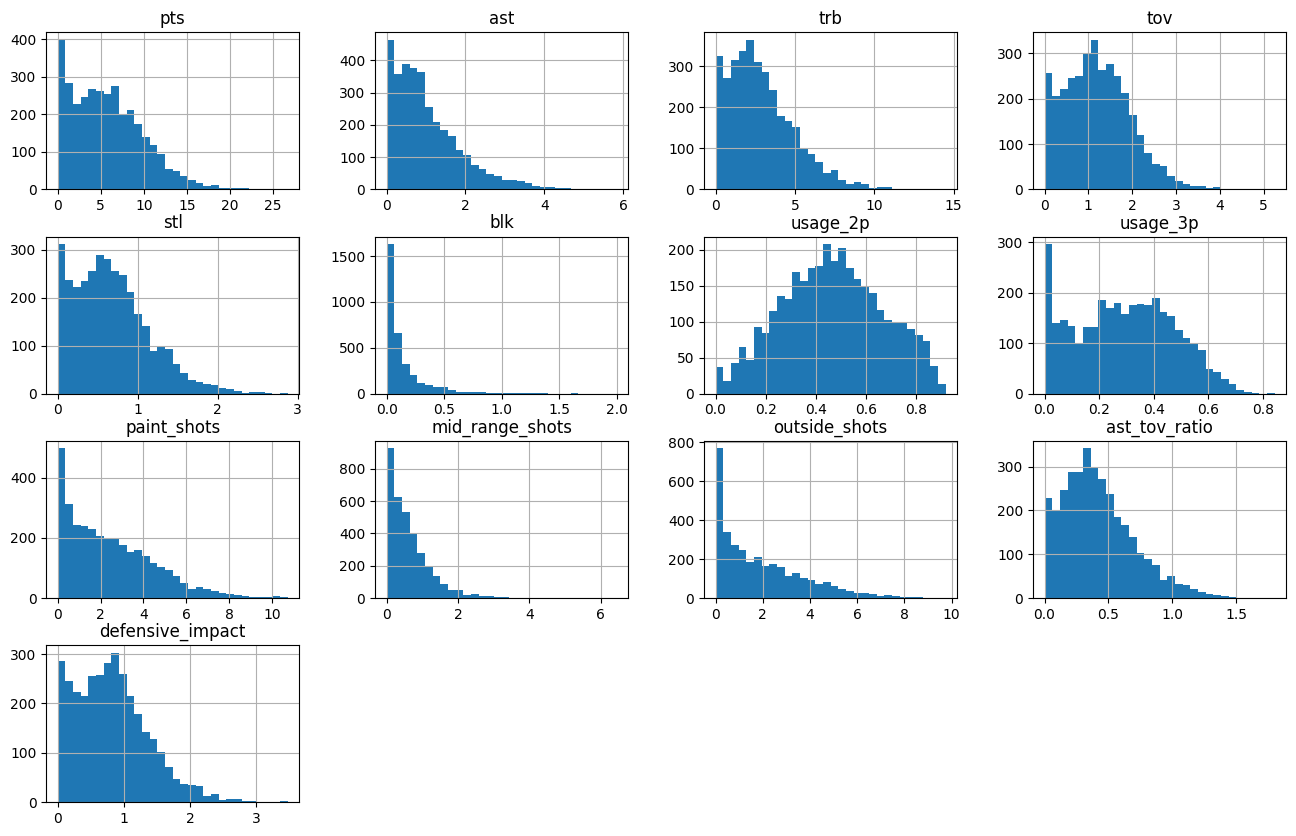

In [84]:
df[candidate_features].hist(bins=30, figsize=(16,10))

[**En**]

Below is an analysis of each variable to determine whether it will be used in the clustering or not.

[**Es**]

A continuación se muestra un análisis de cada variable para determinar si se utilizará en el clustering o no.

[**Cat**]

A continuació es mostra una anàlisi de cada variable per determinar si s'utilitzarà en el clustering o no.

#### Feature pts
- Highly skewed distribution // Distribución muy sesgada // Distribució molt esbiaixada
- Many players with few points // Muchos jugadores con pocos puntos // Molts jugadors amb pocs punts
- Few clear scorers // Pocos anotadores claros // Pocs anotadors clars

***✅ Good for clustering, defines scorer role // Bueno para el clustering, define rol de anotador // Bo per al clustering, defineix rol d'anotador***
#### Feature ast
- Majority close to 0 // La mayoría próximos a 0 // La majoria propers a 0
- Few real creators // Pocos creadores reales // Pocs creadors reals

***✅ Differentiates well point guards vs the rest // Diferencia bien bases vs el resto // Diferència bé bases vs la resta***
#### Feature trb
- Good distribution // Buena distribución // Bona distribució

***✅ Clearly distinguishes interior players // Distingue claramente interiores // Distingueix interiors clarament***
#### Feature tov
- Good distribution // Buena distribución // Bona distribució

***✅ Measures offensive responsibility well // Mide bien la responsabilidad ofensiva // Medeix bé la responsabilitat ofensiva***
#### Feature stl
- Many low values // Muchos valores bajos // Molts valors baixos
- Provides outside defense // Aporta defensa exterior // Aporta defensa exterior

***⚠️ Overlaps with defensive_impact // Se solapa con defensive_impact // Es solapa amb defensive_impact***
#### Feature blk
- Extremely skewed // Extremadamente sesgada // Extremadament esbiaixada
- Few players with blocks // Pocos jugadores con tapones // Pocs jugadors amb taps
- Many 0 // Muchos 0 // Molts 0
- Few high values // Pocos valores altos // Pocs valors alts
- Very specific (only centers) // Muy específica (solo pivots) // Molts específica (només pivots)

***⚠️Better integrated into defensive_impact // Mejor integrada a defensive_impact // Millor integrada a defensive_impact***
#### Variable defensive_impact
- Clear distribution // Distribución clara // Distribució clara
- combines stl + bl // combina stl + bl // combina stl + bl
- better behavior // mejor comportamiento // millor comportament

***✅ The best option to use // La mejor opción a utilizar // La millor opció a utilitzar***
#### Variable usage_2p
- Good shape // Buena forma // Bona forma
- Clear distribution // Distribución clara // Distribució clara
- Difference between interiors vs exteriors // Diferencia entre interiores vs exteriores // Diferència entre interiors vs exteriors

***✅ Very powerful variable for clustering // Variable muy potente para clusterizar // Variable molt potent per clusteritzar***
#### Variable usage_3p
- Many players at 0 but also a lot of variability // Muchos jugadores en 0 pero también mucha variabilidad // Molts jugadors en 0 però també molta variabilitat

 ***✅ Clearly indicates shooters // Indica claramente tiradores // Indica clarament tiradors***
 #### Variable paint_shots
 - Good distribution // Buena dispersión // Bona dispersió

 ***✅ Differentiates interior profiles // Diferencia perfiles interiores // Diferència perfils interiors***

#### Variable mid_range_shots
- Majority almost 0 // Mayoría casi 0 // Majoria quasi 0
- Does not discriminate well // No discrimina bien // No discrimina bé
- Adds noise // Aporta ruido // Aporta soroll

***❌ Removed***

#### Variable outside_shots
- Good shape // Buena forma // Bona forma
- Lots of variability // Mucha variabilidad // Molta variabilitat

***✅ Complements paint_shots // Complementa paint_shots // Complementa paint_shots***

#### Variable ast_tov_ratio
- Very clear distribution // Distribución muy clara // Distribució molt neta
***✅ Very interpretable // Muy interpretable // Molt interpretable***


### For now, we will stay with the following features:

pts, ast, trb, tov, usage_2p, usage_3p, paint_shots, outside_shots, ast_tov_ratio and defensive_impact


[**En**]

Now what is of interest is to see a heatmap to see if two variables are too correlated. This allows us to discard any possible variable that may be redundant.

[**Es**]

Ahora lo que interesa es ver un mapa de calor para ver si dos variables están demasiado correlacionadas. Esto nos permite descartar alguna posible variable que pueda ser redundante.

[**Cat**]

Ara el que interessa es veure un mapa de calor per veure si dues variables estàn massa correlacionades. Això ens permet descartar alguna possible variable que pugui ser redundant.

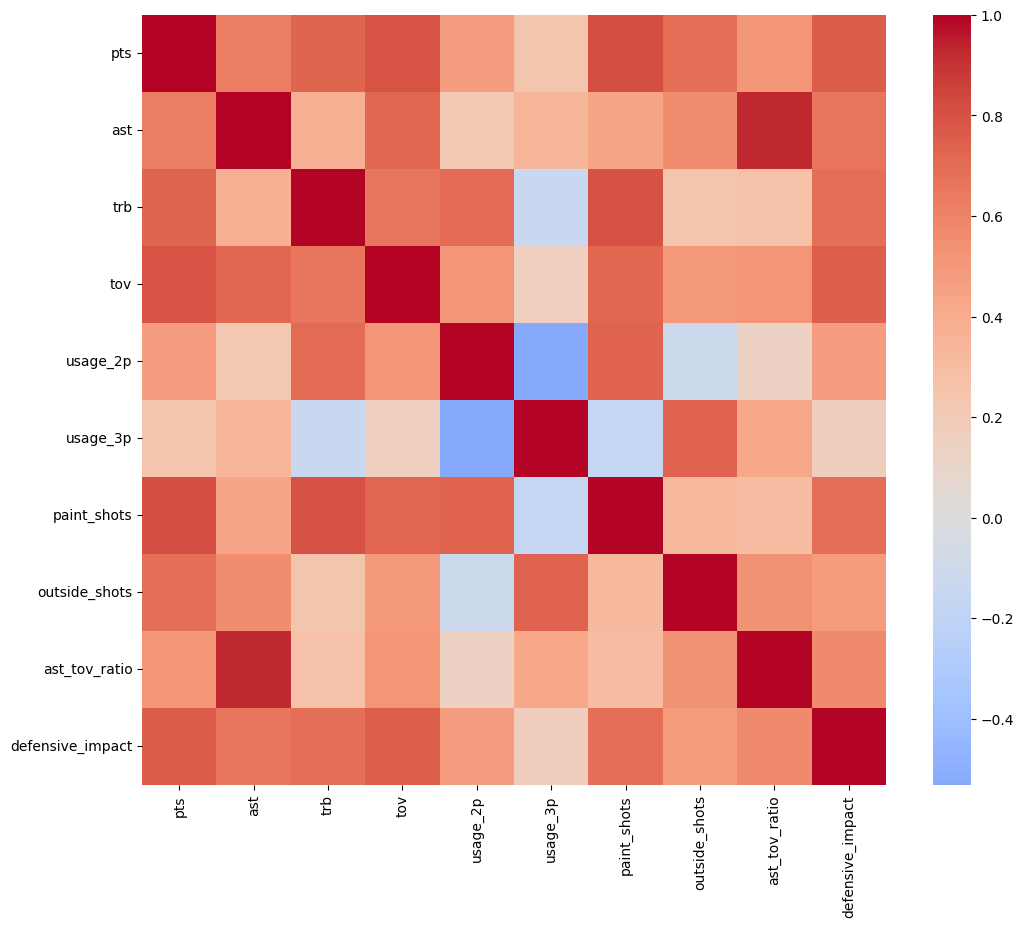

In [85]:
candidate_features = [
    "pts", "ast", "trb", "tov",
    "usage_2p", "usage_3p",
    "paint_shots", "outside_shots",
    "ast_tov_ratio", "defensive_impact"
]

plt.figure(figsize=(12,10))
sns.heatmap(df[candidate_features].corr(), cmap="coolwarm", center=0)
plt.show()


[**En**]

As can be seen, we have a very high correlation between ast and ast_tov_ratio. Therefore, I have personally decided to keep ast_tov_ratio, since this variable not only shows us the number of assists of the player, but also the quality of decision-making, with ast and tov separately, in this case:

|Player|ast|tov|ratio|
|-|-|-|-|
|A|6|6|1.0|
|B|3|1|3.0|

The model could not understand that player A participates a lot but is very chaotic, and player B participates little but is very clean. However, it may be completely justifiable to make other combinations of these data.

**Why not also remove tov if we already have ast_tov_ratio?**

Unlike ast, the tov variable alone also gives us the level of responsibility of the player.


[**Es**]

Como se puede apreciar, tenemos una correlación demasiado alta entre ast y ast_tov_ratio. Por lo tanto, personalmente he decidido quedarme con ast_tov_ratio, ya que esta variable no nos muestra la cantidad de asistencias del jugador, sino también la calidad de toma de decisiones, con ast y tov por separado, en este caso:

|Player|ast|tov|ratio|
|-|-|-|-|
|A|6|6|1.0|
|B|3|1|3.0|

El modelo no podría entender que el jugador A participa mucho pero es muy caótico, y el jugador B participa poco pero es muy limpio. No obstante puede ser completamente justificable hacer otras combinaciones de estos datos.

**¿Por qué no eliminar también tov si ya tenemos ast_tov_ratio?**

A diferencia de ast, la variable tov por sí sola también nos está dando el nivel de responsabilidad del jugador.

[**Cat**]

Com es pot apreciar, tenim una correlació massa alta entre ast i ast_tov_ratio. Per tant, personalment he decidit quedar-me amb ast_tov_ratio, ja que aquesta variable no ens mostra la quantitat d'assistències del jugador, sinó també la qualitat de presa de decisions, amb ast i tov per separat, en aquest cas:

|Jugador|ast|tov|ratio|
|-|-|-|-|
|A|6|6|1.0|
|B|3|1|3.0|

El model no podria entendre que el jugador A participa molt però és molt caòtic, i el jugador B participa poc però és molt net. No obstant això pot ser completament justificable fer altres combinacions d'aquestes dades.

**Per què no eliminar també tov si ja tenim ast_tov_ratio?**

A diferència d'ast, la variable tov per si sola també ens està donant el nivell de responsabilitat del jugador.

In [86]:
final_features = [
    "pts",
    "trb",
    "tov",
    "usage_2p",
    "usage_3p",
    "paint_shots",
    "outside_shots",
    "ast_tov_ratio",
    "defensive_impact"
]

df_final = df[final_features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

df_scaled = pd.DataFrame(
    X_scaled,
    columns=final_features,
    index=df_final.index
)



## Number of clusters (K) selection

[**En**]

To determine the optimal number of clusters (K) for our clustering analysis, it is going to be used both the elbow method and the silhouette method, as I consider that the best way to have a clear idea of the most appropriate K is by comparing both methods.

[**Es**]

Para determinar el número óptimo de clusters (K) para nuestro análisis de clustering, se va a utilizar tanto el método del codo como el método de la silueta, ya que considero que la mejor forma de tener claro el K más adecuado es comparando ambos métodos.

[**Cat**]

Per determinar el nombre òptim de clusters (K) per al nostre anàlisi de clustering, s'utilitzarà tant el mètode del colze com el mètode de la silueta, ja que considero que la millor forma de tenir clar el K més adient és comparant ambdós mètodes.

### Mètode Elbow

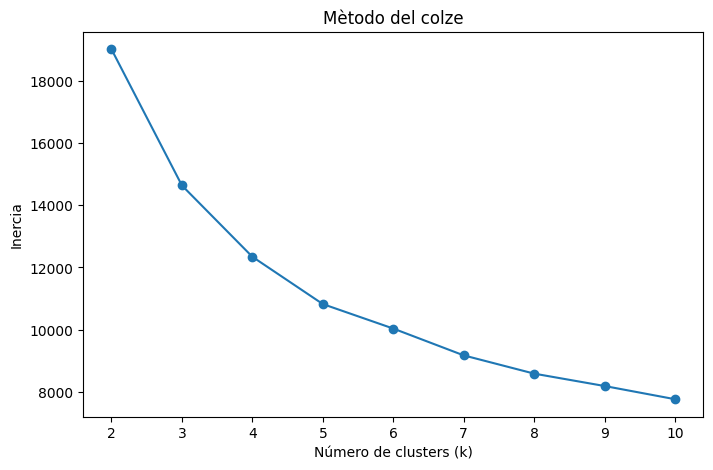

In [87]:
inertias = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Mètodo del colze")
plt.show()

[**En**]

To find the optimal number of clusters (K) using the elbow method, we need to analyze the graph and look for the point where the decrease in inertia starts to be less pronounced. Looking at this specific graph, it can be considered that this point is around K=4 or K=5.

[**Es**]

Para encontrar el número óptimo de clusters (K) utilizando el método del codo, debemos analizar el gráfico y buscar el punto donde la disminución de la inercia comienza a ser menos pronunciada. Viendo este gráfico en concreto, se puede considerar que este punto se encuentra alrededor de K=4 o K=5.

[**Cat**]

Per trobar el nombre òptim de clusters (K) utilitzant el mètode del colze, hem d'analitzar el gràfic i buscar el punt on la disminució de la inèrcia comença a ser menys pronunciada. Veient aquest gràfic en concret, es pot considerar que aquest punt es troba al voltant de K=4 o K=5.


### Mètode silhouette

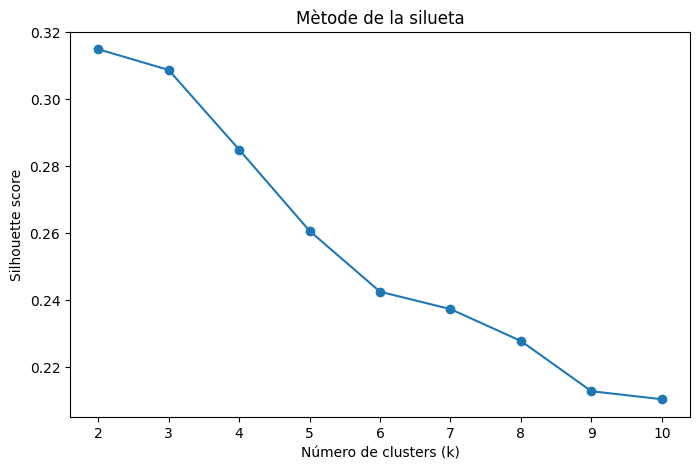

In [88]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Mètode de la silueta")
plt.show()


[**En**]

To find the optimal number of clusters (K) using the silhouette method, we need to analyze the graph and look for the point where the silhouette index is maximum. Looking at this specific graph, it is clearly seen that this point is at K=2, but this is discarded as it would not provide relevant information, it would perfectly only differentiate between starting and substitute players. It would not make sense to not go beyond K=2. That is why it has been considered that the best options are K=3 or K=4, as they are the next highest points of the silhouette index.

[**Es**]

Para encontrar el número óptimo de clusters (K) utilizando el método de la silueta, debemos analizar el gráfico y buscar el punto donde el índice de silueta es máximo. Viendo este gráfico en concreto, se ve claramente que este punto se encuentra en K=2, pero este queda descartado ya que no aportaría información relevante, perfectamente solo diferenciaría entre jugadores titulares y suplentes. No tendría sentido no ir más allá de K=2. Es por eso que se ha considerado que las mejores opciones son K=3 o K=4, ya que son los siguientes puntos más altos del índice de silueta.

[**Cat**]

Per trobar el nombre òptim de clusters (K) utilitzant el mètode de la silueta, hem d'analitzar el gràfic i buscar el punt on l'índex de silueta és màxim. Veient aquest gràfic en concret, es veu clarament que aquest punt es troba a K=2, però aquest queda descartat ja que no aportaria informació rellevant, perfectament només diferenciaria entre jugadors titulars i suplents. No tindria sentit no anar més enllà de K=2. És per això que s'ha considerat que les millors opcions són K=3 o K=4, ja que són els següents punts més alts de l'índex de silueta.


#### Final K selection

[**En**]

After analyzing both methods, it can be concluded that the optimal number of clusters (K) for our clustering analysis is K=4.

[**Es**]

Después de analizar ambos métodos, se puede concluir que el número óptimo de clusters (K) para nuestro análisis de clustering es K=4.

[**Cat**]

Després d'analitzar ambdós mètodes, es pot concloure que el nombre òptim de clusters (K) per al nostre anàlisi de clustering és K=4.

## Clustering results and interpretation

In [89]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters

In [90]:
df["cluster"].value_counts().sort_index() # Quantity of players in each cluster

cluster
0     585
1     986
2    1058
3     744
Name: count, dtype: int64

#### PCA Visualization

[**En**]

To visualize the clustering results, PCA has been used, a dimensionality reduction technique that allows high-dimensional data to be represented in a two-dimensional space. This facilitates the understanding and interpretation of the clustering results. However, it is important to make clear that it is only a visual representation.

[**Es**]

Para visualizar los resultados del clustering, se ha utilizado PCA, una técnica de reducción de dimensiones que permite representar datos de alta dimensión en un espacio bidimensional. Esto facilita la comprensión e interpretación de los resultados del clustering. No obstante, es importante dejar claro que sólo es una representación visual.

[**Cat**]

Per visualitzar els resultats del clustering, s'ha utilitzat PCA, una tècnica de reducció de dimensions que permet representar dades d'alta dimensió en un espai bidimensional. Això facilita la comprensió i interpretació dels resultats del clustering. No obstant, és important deixar clar que només és una representació visual.

In [91]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]


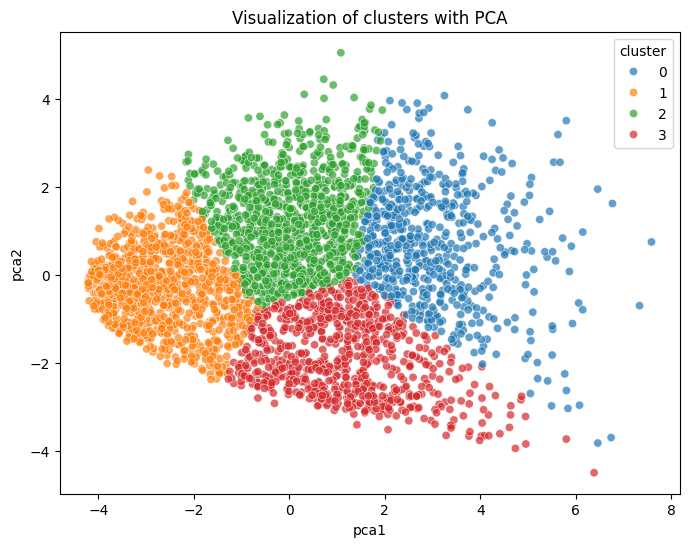

In [92]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="pca1",
    y="pca2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Visualization of clusters with PCA")
plt.show()


#### Analysis of each cluster

[**En**]

This section aims to analyze 10 players from each cluster and the overall average of these to define the similarities between players within the same cluster and the differences with players from other clusters. In this way, we can understand what type of player each cluster represents.

[**Es**]  

Esta sección tiene como objetivo analizar 10 jugadores de cada clúster y la media general de estos para definir las similitudes entre los jugadores dentro del mismo clúster y las diferencias con los jugadores de otros clústers. De esta manera, podemos entender qué tipo de jugador representa cada clúster.

[**Cat**]

Aquesta secció tracta d'analitzar 10 jugadors de cada clúster i la mitjana general d'aquest per poder definir quines similituds hi ha entre els jugadors d'un propi clúster i les diferències amb jugadors d'altres clústers per, d'aquesta forma, poder saber quin tipus de jugador representa cada clúster.

In [93]:
players_by_cluster = (
    df.groupby("cluster")
    .head(10)
)[["player_name", "cluster"] + final_features]

players_by_cluster.sort_values("cluster")


,player_name,cluster,pts,trb,tov,usage_2p,usage_3p,paint_shots,outside_shots,ast_tov_ratio,defensive_impact
8,A. MARTIN DE SOTO MORENO,0,8.265060,5.060241,1.975904,0.421488,0.464187,2.090909,3.727273,1.040486,2.036145
38,M. MAÑES CARRETERO,0,13.972727,5.590909,1.681818,0.473102,0.445836,3.694444,4.777778,0.637288,0.781818
32,E. MAÑES CARRETERO,0,13.203252,6.593496,2.455285,0.535151,0.376614,5.368421,4.868421,1.021176,0.861789
74,S. PARETS BARRIOS,0,12.038462,4.461538,2.730769,0.548148,0.355556,4.346154,3.538462,0.474227,1.346154
65,E. TEJERO CASASAYAS,0,12.933884,6.479339,1.512397,0.554158,0.361286,3.984127,5.444444,0.480263,1.652893
63,Y. RUBIO PRIETO,0,14.060606,4.303030,3.181818,0.511468,0.412844,4.062500,4.250000,0.253623,1.151515
50,A. SERRA MARTINEZ,0,11.160920,4.620690,2.701149,0.688782,0.206273,5.136364,1.727273,0.583851,1.459770
58,A. SEARA RODRIGUEZ,0,18.680000,5.220000,3.380000,0.440633,0.493404,4.640000,7.460000,0.584475,1.920000
72,X. GUIRAO MAJO,0,9.666667,3.571429,1.785714,0.311159,0.598712,2.500000,6.727273,0.897436,0.880952
69,J. HERNANDEZ GIMENEZ,0,14.368421,2.982456,1.877193,0.347458,0.555932,2.563636,5.672727,0.987805,1.578947


In [94]:
cluster_summary = (
    df.groupby("cluster")[final_features]
    .mean()
    .round(2)
)

cluster_summary


,pts,trb,tov,usage_2p,usage_3p,paint_shots,outside_shots,ast_tov_ratio,defensive_impact
cluster,,,,,,,,,
0,11.67,4.74,2.14,0.53,0.37,4.63,4.07,0.70,1.51
1,1.40,0.98,0.43,0.31,0.21,0.57,0.44,0.18,0.25
2,5.85,2.41,1.24,0.39,0.45,1.84,2.85,0.54,0.85
3,6.98,4.77,1.48,0.73,0.12,4.09,0.85,0.36,1.01


# Conclusions

[**En**]

After analyzing the results, I have personally considered that each cluster represents the following type of player:

| Cluster | Player type | Description | Reason |
|--------|------------------|------------|-------|
| 0 | Offensive wings | Players with a high offensive volume, capable of scoring both from inside and outside. They actively participate in attack and have a correct defensive contribution. | They present a high average of points, a balanced use of 2 and 3-point shots, and high values in both interior and exterior shots. |
| 1 | Low rotation players | Players with little participation in the game, usually coming from the bench or with very limited minutes. | They show very low values in all the analyzed variables, indicating a scarce offensive and defensive presence. |
| 2 | Point guards and playmakers | Players in charge of directing the team, with a greater use of outside shooting and active participation in playmaking. | They stand out for a high use of 3-point shots, a good assist-to-turnover ratio, and moderate offensive participation. |
| 3 | Dominant interiors | Players who develop their main activity in the interior zone, with a great presence in physical play and rebounding. | They present a very high use of 2-point shots, a high number of paint shots, good rebound values, and a notable defensive contribution. |

[**Es**]

Después de analizar los resultados, he considerado personalmente que cada clúster representa el siguiente tipo de jugador:

| Cluster | Tipo de jugador | Descripción | Motivo |
|--------|------------------|------------|-------|
| 0 | Aleros ofensivos | Jugadores con un alto volumen ofensivo, capaces de anotar tanto desde el interior como desde el exterior. Participan activamente en ataque y tienen una aportación defensiva correcta. | Presentan una media alta de puntos, un uso equilibrrado del tiro de 2 y 3 puntos, y valores elevados tanto en tiros interiores como exteriores. |
| 1 | Jugadores de rotación baja | Jugadores con poca participación en el juego, habitualmente provenientes del fondo de la banqueta o con minutos muy limitados. | Muestran valores muy bajos en todas las variables analizadas, indicando una escasa presencia ofensiva y defensiva. |
| 2 | Bases y creadores de juego | Jugadores encargados de la dirección del equipo, con un mayor uso del tiro exterior y una participación activa en la creación de juego. | Destacan por un uso elevado del tiro de 3 puntos, un buen ratio de asistencias respecto a pérdidas y una participación ofensiva moderada. |
| 3 | Interiores dominantes | Jugadores que desarrollan su actividad principal en la zona interior, con gran presencia en el juego físico y el rebote. | Presentan un uso muy alto del tiro de 2 puntos, un número elevado de tiros en la pintura, buenos valores de rebote y una aportación defensiva notable. |

[**Cat**]

Després de l'anàlisi de resultat, personalment he considerat que cada clúster representa el següent tipus de jugador

| Cluster | Tipus de jugador | Descripció | Motiu |
|--------|------------------|------------|-------|
| 0 | Exteriors ofensius | Jugadors amb un alt volum ofensiu, capaços d’anotar tant des de l’interior com des de l’exterior. Participen activament en atac i tenen una aportació defensiva correcta. | Presenten una mitjana alta de punts, un ús equilibrat del tir de 2 i 3 punts, i valors elevats tant en tirs interiors com exteriors. |
| 1 | Jugadors de rotació baixa | Jugadors amb poca participació en el joc, habitualment provinents del fons de la banqueta o amb minuts molt limitats. | Mostren valors molt baixos en totes les variables analitzades, indicant una escassa presència ofensiva i defensiva. |
| 2 | Bases i creadors de joc | Jugadors encarregats de la direcció de l’equip, amb un major ús del tir exterior i una participació activa en la creació de joc. | Destaquen per un ús elevat del tir de 3 punts, un bon ratio d’assistències respecte a pèrdues i una participació ofensiva moderada. |
| 3 | Interiors dominants | Jugadors que desenvolupen la seva activitat principal a la zona interior, amb gran presència en el joc físic i el rebot. | Presenten un ús molt alt del tir de 2 punts, un nombre elevat de tirs a la pintura, bons valors de rebot i una aportació defensiva notable. |


## Testing K=3 and K=5

[**En**]

Now out of pure curiosity, clustering has been tried with K=3 and K=5 to see what differences there were.

[**Es**]

Ahora por pura curiosidad se ha probado a hacer el clustering con K=3 y K=5 para ver qué diferencias había.

[**Cat**]

Ara per pura curiositat s'ha provat a fer el clustering amb K=3 i K=5 per veure quines diferències hi havia.

#### K=3

In [95]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)
clusters_3 = kmeans_3.fit_predict(X_scaled)

df["cluster_k3"] = clusters_3

In [96]:
df.groupby("cluster_k3")[final_features].mean().round(2)

,pts,trb,tov,usage_2p,usage_3p,paint_shots,outside_shots,ast_tov_ratio,defensive_impact
cluster_k3,,,,,,,,,
0,8.63,5.28,1.74,0.71,0.15,4.76,1.40,0.42,1.20
1,2.00,1.27,0.56,0.35,0.24,0.82,0.68,0.23,0.34
2,8.03,3.06,1.57,0.42,0.45,2.62,3.67,0.64,1.08


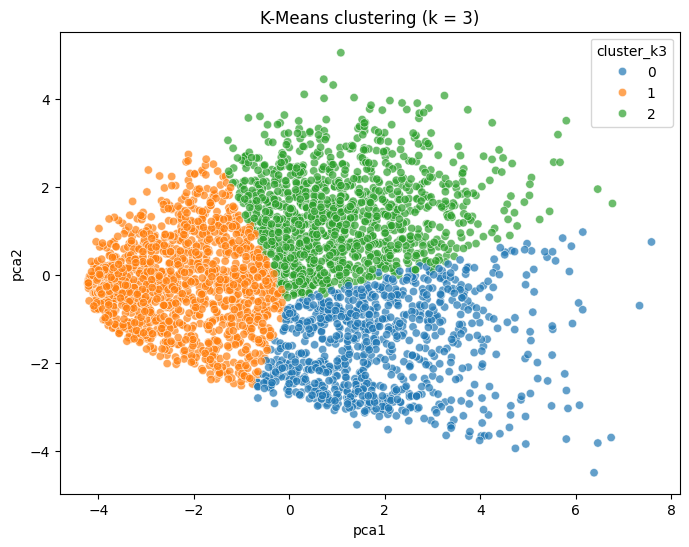

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="pca1",
    y="pca2",
    hue="cluster_k3",
    palette="tab10",
    alpha=0.7
)
plt.title("K-Means clustering (k = 3)")
plt.show()


[**En**]

With K=3, it is observed that the profiles of offensive wings and playmakers are grouped within the same cluster, thus losing the ability to differentiate between these two types of players. This can be a drawback if the goal is to identify and analyze these specific roles within a team.

[**Es**]

Con K=3, se observa que los perfiles de exteriores ofensivos y creadores de juego quedan agrupados dentro de un mismo clúster, perdiendo así la capacidad de diferenciación entre estos dos tipos de jugadores. Esto puede ser un inconveniente si el objetivo es identificar y analizar estos roles específicos dentro de un equipo.

[**Cat**]

Amb K=3, s'observa que els perfils d'exteriors ofensius i creadors de joc queden agrupats dins d'un mateix clúster, perdent així la capacitat de diferenciació entre aquests dos tipus de jugadors. Això pot ser un inconvenient si l'objectiu és identificar i analitzar aquests rols específics dins d'un equip.

#### K=5

In [98]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
clusters_5 = kmeans_5.fit_predict(X_scaled)

df["cluster_k5"] = clusters_5


In [99]:
df.groupby("cluster_k5")[final_features].mean().round(2)


,pts,trb,tov,usage_2p,usage_3p,paint_shots,outside_shots,ast_tov_ratio,defensive_impact
cluster_k5,,,,,,,,,
0,11.54,6.54,2.17,0.72,0.18,6.10,2.02,0.48,1.53
1,1.05,0.75,0.34,0.28,0.19,0.43,0.33,0.15,0.19
2,9.96,3.61,1.85,0.45,0.44,3.33,4.35,0.73,1.30
3,5.55,3.75,1.28,0.67,0.14,3.16,0.89,0.35,0.85
4,4.70,2.05,1.05,0.35,0.45,1.41,2.36,0.48,0.70


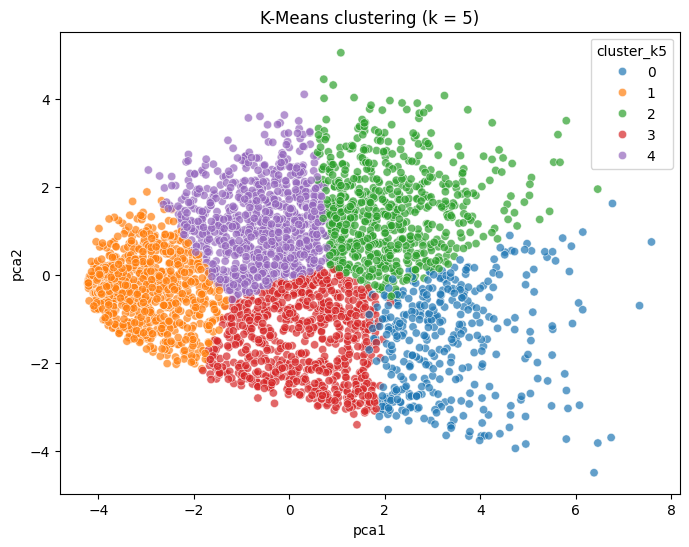

In [100]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="pca1",
    y="pca2",
    hue="cluster_k5",
    palette="tab10",
    alpha=0.7
)
plt.title("K-Means clustering (k = 5)")
plt.show()


[**En**]

With K=5 we have an excessive fragmentation of profiles, splitting already existing roles into subgroups with little significant differences. No clearly differentiated new playing styles appear.

[**Es**]

Ahora con K=5 tenemos una fragmentación excesiva de perfiles, dividiendo roles ya existentes en subgrupos con diferencias poco significativas. No aparecen nuevos estilos de juego claramente diferenciados.

[**Cat**]

Amb K=5 tenim una fragmentació excessiva de perfils, dividint rols ja existents en subgrups amb diferències poc significatives. No apareixen nous estils de joc clarament diferenciats.

## Testing DBSCAN

[**En**]

DBSCAN is another type of clustering technique that is based on the density of points to form groups. Unlike K-means, DBSCAN does not require specifying the number of clusters beforehand and can identify clusters in an arbitrary shape, as well as detect outliers. The first thing we need is to find the right parameters for this model, which are eps (the maximum distance between two points to be considered in the same cluster) and min_samples (the minimum number of points required to form a cluster).

However, knowing the shape that is presented in the global dataset and knowing how DBSCAN works, it can be intuited that this model will not be the most suitable for this case. DBSCAN works better when clusters have a clear density and are well separated, such as, for example, a dartboard-shaped graph. In this case, I will run DBSCAN for purely exploratory, educational reasons and out of curiosity.

[**Es**]

DBSCAN es otro tipo de técnica de clustering que se basa en la densidad de los puntos para formar los grupos. A diferencia de K-means, DBSCAN no requiere especificar el número de clusters previamente y puede identificar clusters de forma arbitraria, así como detectar outliers. Lo primero que necesitamos es encontrar los parámetros adecuados para este modelo, que son eps (la distancia máxima entre dos puntos para considerarlos del mismo cluster) y min_samples (el número mínimo de puntos necesarios para formar un cluster).

No obstante, teniendo en cuenta la forma que se presenta en el conjunto de datos globales y conociendo cómo trabaja DBSCAN, se puede intuir que este modelo no será el más adecuado para este caso. DBSCAN funciona mejor cuando los clusters tienen una densidad clara y están bien separados, como por ejemplo, un gráfico en forma de diana. En este caso, ejecutaré DBSCAN por motivos puramente exploratorios, educativos y por curiosidad.

[**Cat**]

DBSCAN és un altre tipus de tècnica de clustering que es basa en la densitat dels punts per formar els grups. A diferència de K-means, DBSCAN no requereix especificar el nombre de clusters prèviament i pot identificar clusters de forma arbitrària, així com detectar outliers. El primer que necessitem és trobar els paràmetres adequats per a aquest model, que són eps (la distància màxima entre dos punts per considerar-los del mateix cluster) i min_samples (el nombre mínim de punts necessaris per formar un cluster).

No obstant, tenint en compte la forma que es presenta en el conjunt de dades globals i coneixent com treballa DBSCAN, es pot intuir que aquest model no serà el més adequat per a aquest cas. DBSCAN funciona millor quan els clusters tenen una densitat clara i estan ben separats, com per exemple, un gràfic en forma de diana. En aquest cas, executaré DBSCAN per motius purament exploratoris, educatius i per curiositat.

In [101]:
eps_values = np.arange(0.4, 1.5, 0.2)
min_samples_values = [5, 10, 15]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            mask = labels != -1
            score = silhouette_score(X_scaled[mask], labels[mask])

            results.append((eps, ms, n_clusters, score))

for r in results:
    print(f"eps={r[0]:.2f} | min_samples={r[1]} | clusters={r[2]} | silhouette={r[3]:.3f}")

eps=0.40 | min_samples=5 | clusters=7 | silhouette=0.091
eps=0.40 | min_samples=10 | clusters=2 | silhouette=0.325
eps=0.40 | min_samples=15 | clusters=2 | silhouette=0.218
eps=0.60 | min_samples=5 | clusters=13 | silhouette=-0.085
eps=0.60 | min_samples=10 | clusters=3 | silhouette=0.298
eps=0.60 | min_samples=15 | clusters=3 | silhouette=0.158
eps=0.80 | min_samples=5 | clusters=12 | silhouette=-0.028
eps=0.80 | min_samples=10 | clusters=2 | silhouette=0.173
eps=0.80 | min_samples=15 | clusters=2 | silhouette=0.268
eps=1.00 | min_samples=5 | clusters=2 | silhouette=0.179
eps=1.00 | min_samples=10 | clusters=2 | silhouette=0.254
eps=1.20 | min_samples=5 | clusters=2 | silhouette=0.233
eps=1.40 | min_samples=5 | clusters=2 | silhouette=0.377


[**En**]

Now what has been generated is a representation to visualize the statistics of each combination of parameters between eps and min_samples, what we are looking for is to find the one that gives us a higher silhouette number taking into account that the number of clusters must be reasonable. For example, we can have a very high silhouette value with eps=1.4 and min_samples=5 but that would give us only 2 clusters (that is, it would separate between substitute players and starting players for example), which would not provide us with relevant information. Therefore, I consider that the best option is eps=0.6 and min_samples=10, since it has a high silhouette value and gives us a reasonable number of clusters (3 clusters).

[**Es**]

Ahora lo que se ha generado es una representación para visualizar las estadísticas de cada combinación de parámetros entre eps y min_samples, lo que buscamos es encontrar el que nos dé un número de silueta más alto teniendo en cuenta que el número de clusters debe ser razonable. Por ejemplo, podemos tener un valor de silueta muy alto con eps=1.4 y min_samples=5 pero eso nos daría solo 2 clústers (es decir, separaría entre jugadores suplentes y jugadores titulares por ejemplo), cosa que no nos aportaría información relevante. Por tanto, considero que la mejor opción es eps=0.6 y min_samples=10, ya que tiene un valor de silueta alto y nos da un número de clústers razonable (3 clústers).

[**Cat**]

Ara el que s'ha generat és una representació per visualitzar les estadístiques de cada combinació de paràmetres entre eps i min_samples, el que busquem és trobar el que ens doni un número de silueta més alt tenint en compte que el número de clusters ha de ser raonable. Per exemple, podem tenir un valor de silueta molt alt amb eps=1.4 i min_samples=5 però això ens donaria només 2 clústers (és a dir, separaria entre jugadors suplents i jugadors titulars per exemple), cosa que no ens aportaria informació rellevant. Per tant, considero que la millor opció és eps=0.6 i min_samples=10, ja que té un valor de silueta alt i ens dona un número de clústers raonable (3 clústers).


In [102]:
dbscan = DBSCAN(eps=0.60, min_samples=10)
df["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

df["dbscan_cluster"].value_counts().sort_index()


dbscan_cluster
-1    2659
 0     691
 1      13
 2      10
Name: count, dtype: int64

[**En**]

As expected, the result of DBSCAN is not useful for this case. The `-1` represents players that cannot be grouped into any cluster and most players fall into this group, therefore it does not provide us with relevant information.

[**Es**]

Tal y como se esperaba, el resultado de DBSCAN no es útil para este caso. El `-1` representa jugadores que no pueden ser agrupados en ningún clúster y la mayoría de jugadores quedan en este grupo, por lo tanto no nos aporta información relevante.

[**Cat**]

Tal i com s'esperava, el resultat de DBSCAN no es útil per a aquest cas. El `-1` representa jugadors que no poden ser agrupats en cap clúster i la majoria de jugadors queden en aquest grup, per tant no ens aporta informació rellevant.

## Final conclusion

[**En**]

The results obtained show that the clustering model `k-means` has been able to identify clearly differentiated player profiles. From the analyzed statistics, four main types of players have been detected: dominant interiors, offensive wings, playmaking point guards, and low participation players.

The analysis of the means of each cluster confirms that each group presents its own characteristics consistent with real gameplay, allowing for a clear and understandable interpretation of the results. These differences demonstrate that the model correctly separates players according to their playing style and role within the team.

In conclusion, the applied clustering has generated consistent and easily interpretable results, allowing players to be classified into real profiles based on their statistical data.



[**Es**]

Los resultados obtenidos muestran que el modelo de clustering `k-means` ha sido capaz de identificar perfiles de jugadores claramente diferenciados. A partir de las estadísticas analizadas, se han detectado cuatro tipos principales de jugadores: interiores dominantes, aleros ofensivos, bases creadores de juego y jugadores con baja participación.

El análisis de las medias de cada clúster confirma que cada grupo presenta características propias y coherentes con el juego real, lo que permite interpretar los resultados de manera clara y comprensible. Estas diferencias demuestran que el modelo separa correctamente a los jugadores según su estilo de juego y su rol dentro del equipo.

En conclusión, el clustering aplicado ha generado resultados consistentes y fácilmente interpretables, permitiendo clasificar a los jugadores en perfiles reales a partir de sus datos estadísticos.

[**Cat**]

Els resultats obtinguts mostren que el model de clustering `k-means` ha estat capaç d’identificar perfils de jugadors clarament diferenciats. A partir de les estadístiques analitzades, s’han detectat quatre tipus principals de jugadors: interiors dominants, exteriors ofensius, bases creadors de joc i jugadors amb baixa participació.

L’anàlisi de les mitjanes de cada clúster confirma que cada grup presenta característiques pròpies i coherents amb el joc real, fet que permet interpretar els resultats de manera clara i comprensible. Aquestes diferències demostren que el model separa correctament els jugadors segons el seu estil de joc i el seu rol dins l’equip.

En conclusió, el clustering aplicat ha generat resultats consistents i fàcilment interpretables, permetent classificar els jugadors en perfils reals a partir de les seves dades estadístiques.